# Loading libraries

In [6]:
#Libraries for data manipulation
import pandas as pd
import numpy as np

#Libraries for data visualization
import matplotlib.pyplot as plt                   #for plotting
import seaborn as sns                             #for data visualization
import plotly.express as px                       #for plotting

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

# Importing the loan.csv file

#### "C:\Users\kalla\AppData\Local\Temp\ipykernel_10752\1713180986.py:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False."

In [7]:
# Due to the above warning message we have included low_memory = False

loan = pd.read_csv("loan.csv", low_memory=False)
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

# Setting Dataframe display options

In [8]:
# Extending the view of dataframe 

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 115)
pd.set_option('display.width', None)

# Setting style for seaonrn

sns.color_palette("cubehelix", 8)
sns.set_style("whitegrid", {'axes.grid' : False})

# Data Exploration & Data Cleaning

In [9]:
# Finding data types of all columns and composition of null values across all columns
# Have used 'verbose' to display information of all columns and complete summary

loan.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [10]:
# Find the number of NaN values across all columns

pd.options.display.min_rows = 200
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [11]:
# Find the Total number of columns which have all null values

null_cols = loan.columns[loan.isnull().all()]
len(null_cols)

54

In [12]:
#Display the columns which have all null values

loan.columns[loan.isnull().all()]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

# Removing and fixing Missing Values in Columns

In [13]:
# Remove all the 54 columns (as found above) from the dataframe which have all null values. 
# Remaining columns will be now 111 - 54 = 57

loan = loan[loan.columns[~loan.isnull().all()]]
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [14]:
#Display columns with atleast one null value

loan[loan.columns[loan.isnull().any()]] 

emp_title emp_length  \
0                                                 NaN  10+ years   
1                                               Ryder   < 1 year   
2                                                 NaN  10+ years   
3                                 AIR RESOURCES BOARD  10+ years   
4                            University Medical Group     1 year   
5                                Veolia Transportaton    3 years   
6                           Southern Star Photography    8 years   
7                                     MKC Accounting     9 years   
8                                                 NaN    4 years   
9                                           Starbucks   < 1 year   
10                              Southwest Rural metro    5 years   
11                                               UCLA  10+ years   
12                Va. Dept of Conservation/Recreation   < 1 year   
13                                             Target    3 years   
14                                              SFMTA    3 years   
15                           Internal revenue Service   < 1 year   
16                                  Chin's Restaurant    4 years   
17                                           Duracell  10+ years   
18                              Connection Inspection     1 year   
19                       Network Interpreting Service    6 years   
20                   Archdiocese of Galveston Houston    3 years   
21                                     Osram Sylvania  10+ years   
22                                          Value Air  10+ years   
23                                   Wells Fargo Bank    5 years   
24                                    bmg-educational     1 year   
25                     Winfield Pathology Consultants    2 years   
26                                        nyc transit    9 years   
27                                          Frito Lay    2 years   
28            Shands Hospital at the University of Fl  10+ years   
29                                     Oakridge homes   < 1 year   
30                                                NaN    7 years   
31                 Audubon Mutual Housing Corporation    5 years   
32                                   US Legal Support    2 years   
33                             Good Samaritan Society    2 years   
34                               GREG BARRETT DRYWALL    7 years   
35                                    Sharp Lawn Inc.  10+ years   
36                              Department of Justice    2 years   
37                                    Gateway Hospice     1 year   
38                                 Cox Communications     1 year   
39           United States Infrastructure Corporation     1 year   
40                             Nucor Building Systems    4 years   
41                                     John Wiley Jr.  10+ years   
42                                                NaN    9 years   
43                                      citizens bank  10+ years   
44                          Stewart Enterprises, Inc.  10+ years   
45                                  golfers warehouse    6 years   
46                                 STERIS Corporation  10+ years   
47                             Costco Wholesale Corp.    6 years   
48                                           Helicoil  10+ years   
49                     cognizant technology solutions    5 years   
50                                   Caterpillar Inc.    8 years   
51                              City of Santa Monica     9 years   
52                                 Aerotek Scientific   < 1 year   
53                              Chemat Technology Inc    4 years   
54                                      Scott & White     1 year   
55                                             Costco    7 years   
56                                    CA Technologies    7 years   
57                                            Netflix   < 1 year   
58                              

In [15]:
#Find the Number of columns that have atleast one missing value out of total 57 columns

no_of_cols_with_atleast_one_null = loan.columns[loan.isna().sum() > 0]
len(no_of_cols_with_atleast_one_null)

14

In [16]:
#Find only the columns that has atleast one missing value and the percentage of missing values in such columns.

percent_missing = loan.isnull().sum() * 100 / len(loan)
percent_missing = percent_missing[percent_missing >0]
percent_missing

emp_title                      6.191303
emp_length                     2.706650
desc                          32.585543
title                          0.027696
mths_since_last_delinq        64.662487
mths_since_last_record        92.985372
revol_util                     0.125891
last_pymnt_d                   0.178765
next_pymnt_d                  97.129693
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
dtype: float64

In [17]:
# Dropping the columns - mths_since_last_record, mths_since_last_delinq, next_pymnt_d as more than 60% of their values are 
# missing. Total remainining columns now will be 57 - 3 = 54.

loan.drop(columns=['mths_since_last_record', 'mths_since_last_delinq' , 'next_pymnt_d'], inplace=True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [18]:
# Finding the number of distinct/unique values in each column. NaN values are ignored. We don't include NaN in the counts.
# This will have a slight impact only for the columns - collections_12_mths_ex_med, chargeoff_within_12_mths, tax_liens.

loan.nunique(axis=0, dropna=True).sort_values(ascending=True)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [19]:
# Further identifying columns having single unqiue value all throughout

unique_value_cols = loan.nunique(axis=0, dropna=True)
unique_value_cols = unique_value_cols[unique_value_cols==1]
unique_value_cols

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [20]:
# Delete the above 9 columns from the dataframe as each of them has only one single value throughout. These will have no
# impact on our analysis.
# So the count of columns will be now 54 - 9 = 45.

loan.drop(columns=['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type',
                   'acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], inplace=True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [21]:
loan.shape

(39717, 45)

In [22]:
#Again find only the columns that has atleast one missing value and the percentage of null values in such columns.

percent_missing = loan.isnull().sum() * 100 / len(loan)
percent_missing = percent_missing[percent_missing >0]
percent_missing

emp_title                6.191303
emp_length               2.706650
desc                    32.585543
title                    0.027696
revol_util               0.125891
last_pymnt_d             0.178765
last_credit_pull_d       0.005036
pub_rec_bankruptcies     1.754916
dtype: float64

In [23]:
#Find the count of null values against the remainaing columns which have null values
count_missing = loan.isnull().sum() 
count_missing = count_missing[count_missing >0]
count_missing

emp_title                2459
emp_length               1075
desc                    12942
title                      11
revol_util                 50
last_pymnt_d               71
last_credit_pull_d          2
pub_rec_bankruptcies      697
dtype: int64

The columns 'emp_length' and 'pub_rec_bankruptcies' have null values which can be removed or fixed depending on their relevance to the purpose of the analysis

In [24]:
# Checking values in emp_length column for feasibility of inserting null values

loan.emp_length.value_counts(dropna=False)

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
NaN          1075
Name: count, dtype: int64

There is no proper logic to fix the null values (1075) and forcibly doing this lead to loss of information or exaggeration. So it is better to keep missing values as such rather than exaggerating the existing rows/columns considering very small percentage of missing values which is 2.71.

In [25]:
# Checking values in pub_rec_bankruptcies columns for feasibility of inserting null values

loan.pub_rec_bankruptcies.value_counts(dropna=False)

pub_rec_bankruptcies
0.0    37339
1.0     1674
NaN      697
2.0        7
Name: count, dtype: int64

The column 'pub_rec_bankruptcies' mostly has value 0 which can be imputed in place of null. This will have no impact on 
the analysis.

In [26]:
# Inserting 0 for null values in pub_rec_bankruptcies column

loan.pub_rec_bankruptcies.fillna(0,inplace=True)

In [27]:
# The column 'last_credit_pull_d' has only two missing values of dates (0.005% of total). So we will keep them as it is. 
#Should not impact the analysis as their two corresponding rows are fully loaded with other column values.

loan[loan.last_credit_pull_d.isna()]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
26025  575712     740467       5000         5000           5000.0   36 months   
39476  186499     186347       1000         1000            875.0   36 months   

      int_rate  installment grade sub_grade emp_title emp_length  \
26025   11.12%       163.98     B        B3       NaN    5 years   
39476    7.12%        30.94     A        A1       NaN   < 1 year   

      home_ownership  annual_inc verification_status issue_d  loan_status  \
26025           RENT     96000.0        Not Verified  Sep-10  Charged Off   
39476       MORTGAGE    120000.0        Not Verified  Dec-07   Fully Paid   

                                                     url  \
26025  https://lendingclub.com/browse/loanDetail.acti...   
39476  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc         purpose  \
26025                                                NaN  small_business   
39476  No more then 25$ per lender. Please read the r...           other   

                            title zip_code addr_state   dti  delinq_2yrs  \
26025         for my toy business    900xx         CA  4.04            0   
39476  Research On Global Warming    941xx         CA  0.65            0   

      earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
26025           Oct-97               0         4        0       7172   
39476           Jul-97               1         7        0       2227   

      revol_util  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
26025     80.60%          9        0.0            0.0  3362.960000   
39476      3.80%         37        0.0            0.0  1110.813028   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
26025          3362.96          2553.55         702.45                 0.0   
39476           971.96          1000.00         110.81                 0.0   

       recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
26025      106.96                     1.34       Jun-12           163.98   
39476        0.00                     0.00       Aug-10           185.80   

      last_credit_pull_d  pub_rec_bankruptcies  
26025                NaN                   0.0  
39476                NaN                   0.0

In [28]:
# The column 'revol_util' has only 50 missing values of dates (0.13% of total). So we will impute those to 0%. 
# Maintaining numerical values in column will help to do univariate and bivariate analysis later on.
# We should not delete them as all the corresponding rows (in which they are)are fully loaded with other column values.

#loan[loan.revol_util.isna()]
loan.revol_util.fillna('0%',inplace=True)

In [29]:
# The column 'last_pymnt_d' has only 71 missing values of dates (0.18% of total). So we will keep them as it is. 
# There is no logic at hand to impute dates.
# Should not impact the analysis as all the corresponding rows (in which they are)are fully loaded with other column values.

loan[loan.last_pymnt_d.isna()]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
26     1069800    1304679      15000        15000           8725.0   
2724   1032519    1262161       8000         8000           3975.0   
3613   1016039    1243723       6400         6400           6400.0   
3985   1009833    1236591      18000        18000          18000.0   
4206   1006579    1232989       1800         1800           1800.0   
4803    996977    1221844       1500         1500           1500.0   
5716    980312    1203495       2000         2000           2000.0   
6253    971529    1193277       1400         1400           1400.0   
6259    971449    1193186      30000        30000           7100.0   
6768    892468    1109415       4000         4000           3975.0   
6943    890159    1106737       4800         4800           4800.0   
6967    889684    1106242       2200         2200           2200.0   
7137    886664    1102665      10400        10400          10375.0   
8429    859957    1072685      13500        13500          13475.0   
8707    859150    1071830      35000        35000          34975.0   
10175   836872    1046958       4600         4600           4600.0   
11051   821564    1029915      22600        22600           8925.0   
11468   813908    1021386       1500         1500           1500.0   
11523   812628    1019801       8450         8450           8450.0   
11703   809611    1016456       3000         3000           3000.0   
11860   807187    1013717       9600         9600           6375.0   
12026   804512    1010400       5000         5000           3325.0   
12739   792555     996981       6000         6000           4450.0   
13661   777801     980327       9600         9600           9575.0   
13891   772732     974723       2000         2000           1900.0   
13969   772782     974777      12325        12325          12075.0   
14220   768963     954342       3450         3450           3450.0   
14642   762630     963168       5000         5000           4175.0   
14839   759372     932652       1000         1000           1000.0   
14871   758813     959019       5000         5000           4175.0   
16301   734671     931223      10000        10000           8600.0   
16325   734341     930851       2000         2000           1875.0   
16719   727583     923109       5550         5550           5550.0   
17913   702881     894760       1375         1375           1375.0   
18037   706424     898629       7000         7000           7000.0   
18216   702165     894023      22000        22000          19000.0   
18316   699321     890868      10000        10000          10000.0   
18332   693361     884183       8000         8000           8000.0   
22998   620448     795220       2500         2500           2500.0   
24469   600073     770195       2400         2400           2400.0   
24779   595785     764878       2400         2400           2400.0   
24881   593837     762588       1000         1000           1000.0   
26775   563684     725335       2400         2400           2400.0   
27644   550066     709061       2000         2000           2000.0   
28155   542658     700248       3500         3500           3500.0   
28547   535687     692160       4000         4000           3900.0   
28685   534313     690565       7000         7000           6975.0   
28980   529224     684409       4750         4750           4750.0   
29635   520008     672218       3600         3600           3600.0   
30297   510546     659245      20000        20000          19150.0   
31206   498235     638937       1000         1000           1000.0   
31359   496276     635867      20000        20000          17375.0   
32322   483343     615041       4000         4000           4000.0   
32378   483079     614652      10000        10000           9300.0   
32545   480843     611346       1000         1000           1000.0   
32593   480401     610718      10000        10000           3975.0   
32760   478160     607

In [30]:
# Final check for missing values across the loan dataset
loan.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12942
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util

# Removing and fixing Missing Values in Rows

In [31]:
# Check how many rows have all missing values

print('Total empty Rows:')
print(loan.isnull().all(axis=1).sum())

# Observation: There are no empty rows in whole dataset.

Total empty Rows:
0


In [32]:
# Checking for missing values across the rows

print((loan.isnull().sum(axis=1)).max())

# Observation: As the max number of missing value in a row is very low compared to the count of columns(40 after removing 
# irrelevant columns), we can ignore the missing values as the impact is insignificant.

4


# Check for and delete unnecessary/filtering columns and rows

In [33]:
# Check for duplicate rows in the loan dataset based on member_id column

print(loan.duplicated(subset=None, keep='first').count())
duplicate=loan[loan.duplicated(['member_id'])]
duplicate

# Observation: There are no duplicate rows in loan dataset

39717


Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, pub_rec_bankruptcies]
Index: []

In [34]:
# Removing the following column as they have no significance to the analysis. They hold infomration which might not have 
# significance to the analysis.

loan.drop(columns=['desc', 'id', 'member_id', 'url','title', 'zip_code'], inplace=True)
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_title                37258 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [35]:
# Removing loan data having loan_status as 'Current'. The focus of our analysis is on Completely Paid loan and Defaulted 
# loan. Current loans are not in scope of our analysis.
# Also when Loan status is 'Current', the outstanding principal amount is non-zero. So after dropping rows having loan status
# as 'Current' the outstanding principal('out_prncp') amount column will be all zero.

loan=loan[~(loan.loan_status == 'Current')]
# Shape of the dataframe after removing columns
print(loan.shape)

(38577, 39)


In [36]:
# Identifying further irrelevant columns which contain information in the post loan approval stage when the loan is either
# continuing or the loan is closed. They have no relevance to the analysis

loan=loan.drop(labels=['out_prncp','out_prncp_inv','recoveries','collection_recovery_fee','funded_amnt_inv'],axis=1)
loan.shape

(38577, 34)

# Standardizing values

In [37]:
# Removing % symbol and converting into numbers

loan.int_rate=loan.int_rate.apply(lambda x : float(x.replace('%','')))
loan['revol_util'] = loan['revol_util'].str.rstrip('%')

#Removing 'months' suffix and converting it into numbers
loan['term'] = loan['term'].str.rstrip('months')

loan[['int_rate', 'revol_util', 'term']].head()

int_rate revol_util  term
0     10.65      83.70   36 
1     15.27       9.40   60 
2     15.96      98.50   36 
3     13.49         21   36 
5      7.90      28.30   36

In [38]:
# Formating 'emp_length' column to make it fit for numerical analysis later. Translating text information to only numeric

loan["emp_length"] = [str(x).replace('years','').replace('+','').replace('< 1','0.5').replace('year','') 
                      for x in loan["emp_length"]]

loan["emp_length"].replace('nan', np.nan, inplace=True) 

print(loan["emp_length"])
print(loan["emp_length"].isnull().sum())

0         10 
1        0.5 
2         10 
3         10 
5          3 
6          8 
7          9 
8          4 
9        0.5 
10         5 
11        10 
12       0.5 
13         3 
14         3 
15       0.5 
16         4 
17        10 
18         1 
19         6 
20         3 
21        10 
22        10 
23         5 
24         1 
25         2 
26         9 
27         2 
28        10 
29       0.5 
30         7 
31         5 
33         2 
34         7 
35        10 
36         2 
37         1 
38         1 
40         4 
41        10 
42         9 
43        10 
44        10 
45         6 
46        10 
47         6 
48        10 
49         5 
50         8 
51         9 
52       0.5 
53         4 
54         1 
55         7 
56         7 
57       0.5 
58         2 
59         1 
60       0.5 
61         6 
62       0.5 
63       0.5 
64        10 
65         7 
66         5 
67         4 
68         4 
69         2 
70         5 
71         5 
72         1 
73         3 
74    

# Correcting Data Types and Deriving New Columns

In [39]:
# Extracting month and year from 'issue_d'

loan['issue_d_year']=pd.to_datetime(loan['issue_d'],format='%b-%y').dt.year
loan['issue_d_month']=pd.to_datetime(loan['issue_d'],format='%b-%y').dt.month

loan[['issue_d', 'issue_d_month', 'issue_d_year']].head()

issue_d  issue_d_month  issue_d_year
0  Dec-11             12          2011
1  Dec-11             12          2011
2  Dec-11             12          2011
3  Dec-11             12          2011
5  Dec-11             12          2011

In [40]:
# Extracting month and year from 'earliest_cr_line'

loan['earliest_cr_line_year']=pd.to_datetime(loan['earliest_cr_line'],format='%b-%y').dt.year
loan['earliest_cr_line_month']=pd.to_datetime(loan['earliest_cr_line'],format='%b-%y').dt.month

loan[['earliest_cr_line', 'earliest_cr_line_month', 'earliest_cr_line_year']].head()

earliest_cr_line  earliest_cr_line_month  earliest_cr_line_year
0           Jan-85                       1                   1985
1           Apr-99                       4                   1999
2           Nov-01                      11                   2001
3           Feb-96                       2                   1996
5           Nov-04                      11                   2004

In [41]:
# Extracting month and year from 'last_pymnt_d'

loan['last_pymnt_d_year']=pd.to_datetime(loan['last_pymnt_d'],format='%b-%y').dt.year
loan['last_pymnt_d_month']=pd.to_datetime(loan['last_pymnt_d'],format='%b-%y').dt.month

loan[['last_pymnt_d', 'last_pymnt_d_month', 'last_pymnt_d_year']].head()

last_pymnt_d  last_pymnt_d_month  last_pymnt_d_year
0       Jan-15                 1.0             2015.0
1       Apr-13                 4.0             2013.0
2       Jun-14                 6.0             2014.0
3       Jan-15                 1.0             2015.0
5       Jan-15                 1.0             2015.0

In [42]:
# Extracting month and year from 'last_credit_pull_d'

loan['last_credit_pull_d_year']=pd.to_datetime(loan['last_credit_pull_d'],format='%b-%y').dt.year
loan['last_credit_pull_d_month']=pd.to_datetime(loan['last_credit_pull_d'],format='%b-%y').dt.month

loan[['last_credit_pull_d', 'last_credit_pull_d_month', 'last_credit_pull_d_year']].head()

last_credit_pull_d  last_credit_pull_d_month  last_credit_pull_d_year
0             May-16                       5.0                   2016.0
1             Sep-13                       9.0                   2013.0
2             May-16                       5.0                   2016.0
3             Apr-16                       4.0                   2016.0
5             Jan-16                       1.0                   2016.0

In [43]:
# Converting key quantitative columns into numeric data so as to find potential correlation between any two of them.


cols1 = ['loan_amnt','funded_amnt','int_rate','installment','annual_inc','dti','total_pymnt', 'term',
         'emp_length','revol_util']
loan[cols1] = loan[cols1].apply(pd.to_numeric)

In [39]:
# Changing data type of categorical columns to Category

#loan.grade=loan.grade.astype('category')
#loan.sub_grade=loan.sub_grade.astype('category')
#loan.home_ownership=loan.home_ownership.astype('category')
#loan.verification_status=loan.verification_status.astype('category')
#loan.purpose=loan.purpose.astype('category')
#loan.addr_state=loan.addr_state.astype('category')


In [44]:
loan.dtypes

loan_amnt                     int64
funded_amnt                   int64
term                          int64
int_rate                    float64
installment                 float64
grade                        object
sub_grade                    object
emp_title                    object
emp_length                  float64
home_ownership               object
annual_inc                  float64
verification_status          object
issue_d                      object
loan_status                  object
purpose                      object
addr_state                   object
dti                         float64
delinq_2yrs                   int64
earliest_cr_line             object
inq_last_6mths                int64
open_acc                      int64
pub_rec                       int64
revol_bal                     int64
revol_util                  float64
total_acc                     int64
total_pymnt                 float64
total_pymnt_inv             float64
total_rec_prncp             

# Identifying and removing outliers

Checking outlier values in all quantitative variables using box plot. The key quantitative variables are 'loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'dti'

In [45]:
#loan_amnt

fig=px.box(loan,x='loan_amnt',width=800,height=350,title='Distribution Plot - Loan Amount',
           labels={'loan_amnt':'Loan Amount'})
fig.show()

# Upper fence is 29.175k and this is close to max loan of 35k. So this will not impact the analysis.

Inference:  Upper fence is 29.175k and this is close to max loan of 35k. So this will not impact the analysis.

In [46]:
#funded_amnt

fig=px.box(loan,x='funded_amnt',width=800,height=350,title='Distribution Plot - Funded Amount',
           labels={'funded_amnt':'Funded Amount'})
fig.show()

# Upper fence is 29.37k and this is close to max funded_amnt of 35k. So this will not impact the analysis.

Inference: Upper fence is 29.37k and this is close to max funded_amnt of 35k. So this will not impact the analysis.

In [47]:
#int_rate

fig = px.box(loan,x='int_rate',width=800,height=350,title='Distribution Plot - Interest Rate',
       labels={'int_rate':'Interest Rate'})
fig.show()

# Upper fence is 22.48 and this is very close to max of 24.6. So this will not impact the analysis.

Inference: Upper fence is 22.48 and this is very close to max of 24.6. So this will not impact the analysis.

In [48]:
#annual_inc

fig = px.box(loan,x='annual_inc',width=1000,height=350,title='Distribution Plot - Annual Income',
       labels={'annual_inc':'Annual Income'})
fig.show()

# Upper fence is 145k and this is very far behind the max of 6M. Since this will potentially impact the analysis, so we may
# have to remove the outliers from annual_inc. But let's do further analysis.

Inference: Upper fence is 145k and this is very far behind the max of 6M. Since this will potentially impact the analysis, so we may have to remove the outliers from annual_inc. But let's do further analysis.

In [49]:
# Finding the 99 percentile annual income population
print(np.percentile(loan.annual_inc, 99))



234143.99999999878


In [50]:
# Before deleting the outlier income group, finding outlier income group (greater than 99 percentile) who are also loan 
# defaulters. Status 1 means 'Charged off'

Outlier_income_group = loan[loan.annual_inc > np.percentile(loan.annual_inc,99)]
print(len(Outlier_income_group))
print(Outlier_income_group.loan_status.value_counts())


386
loan_status
Fully Paid     343
Charged Off     43
Name: count, dtype: int64


Observation: We will not remove the outliers (43 out of 398) as we try need to find the reason behind their loan default in spite of 
earning high. These are realistic outliers and we cannot ignore them.

In [51]:
#dti

fig = px.box(loan,x='dti',width=800,height=350,title='Distribution Plot - Debt To Income Ratio',
       labels={'dti':'DTI ratio'})
fig.show()
#  There are no outliers in dti hence we can move ahead with analysis.

Inference: There are no outliers in dti hence we can move ahead with analysis.

In [52]:
#installment

fig = px.box(loan,x='installment',width=800,height=350,title='Distribution Plot - Installment',
       labels={'installment':'Installment'})
fig.show()

Inference: Upper fence is 815 and this is fairly far behind the max of 1305. Since this will potentially impact the analysis, so we may have to remove the outliers from 'installment'. But let's do further analysis.

In [53]:
# Finding the 97 percentile installment population and this is almost close to the Upper Fence of 815.
print(np.percentile(loan.installment, 97))


830.8444000000003


In [54]:
# Finding outlier installment group (greater than 97 percentile) who are also loan defaulters. Status 1 means 'Charged off'

Outlier_installment_group = loan[loan.installment > np.percentile(loan.installment,97)]

print(len(Outlier_installment_group))
len(Outlier_installment_group[Outlier_installment_group.loan_status == 'Charged Off'])

1158


224

Installment: We will not remove the outliers (224 out of 1158). It gives an insight that close to 19% of the borrowers who are among the high installment payers have turned out to be defaulters. So high installment payers can be potential defaulters.

# Univariate Analysis

loan_status
Fully Paid     85.413588
Charged Off    14.586412
Name: count, dtype: float64


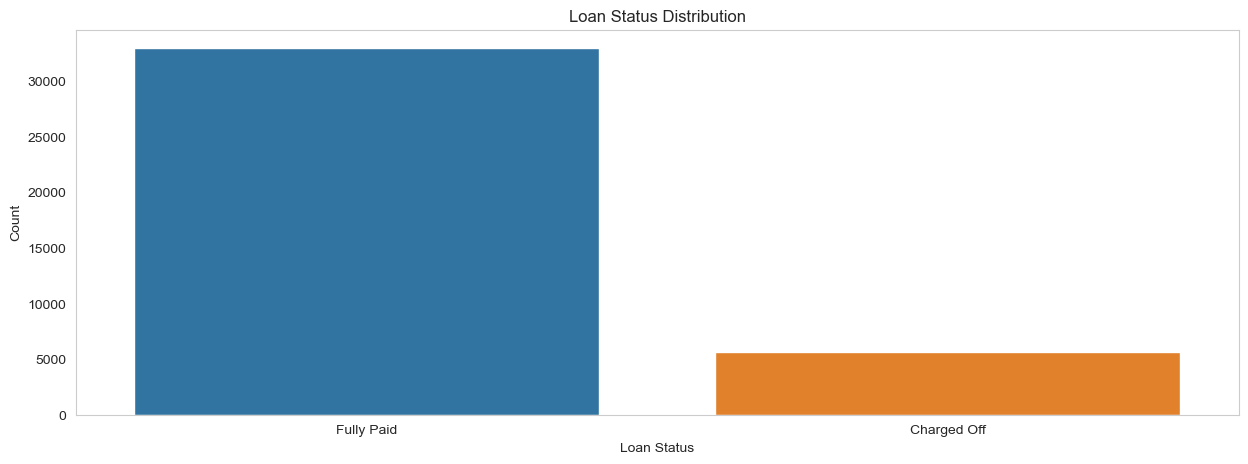

In [55]:
# Loan status 

print(loan.loan_status.value_counts()*100/loan.loan_status.count())

plt.figure(figsize=(15,5))
ax = sns.countplot(x ='loan_status', data = loan)
#ax.annotate('Fully Paid',xy=(0.15,0.5),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
#ax.annotate('Charged Off',xy=(0.50,0.1),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
ax.set_title('Loan Status Distribution')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')

plt.show()

Inference: In the dataset,number of loan defaulters are low as compared to those who fully paid.

term
36    75.42318
60    24.57682
Name: count, dtype: float64


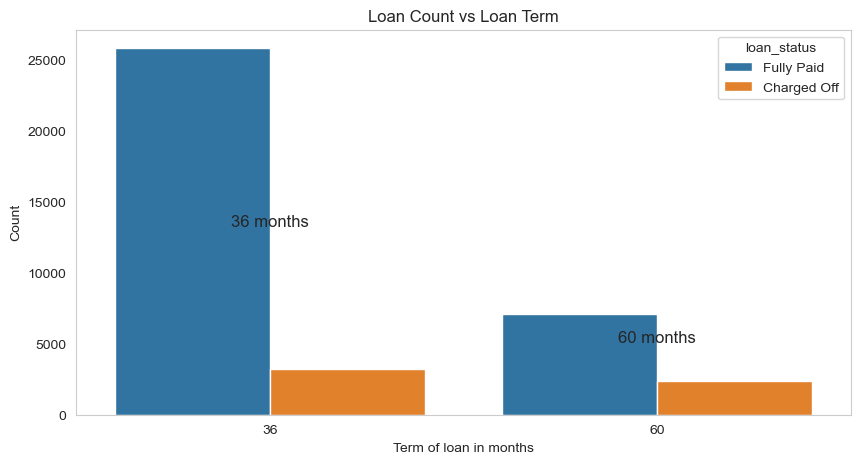

In [56]:
# Term of loan 

print(loan.term.value_counts()*100/loan.term.count())

plt.figure(figsize=(10,5))
ax = sns.countplot(x ='term', data = loan,hue='loan_status')
ax.annotate('36 months',xy=(0.25,0.5),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
ax.annotate('60 months',xy=(0.75,0.2),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
ax.set_title('Loan Count vs Loan Term')
ax.set_xlabel('Term of loan in months')
ax.set_ylabel('Count')

plt.show()

Inference: 3/4th of the borrowers took a loan for 36 months, 1/4th took for 60 months

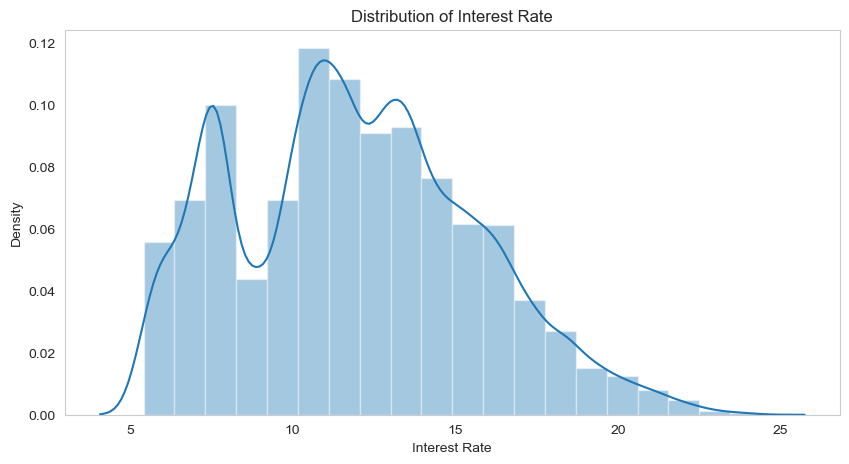

In [57]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(loan.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

Inference: The higher density of borrowers have their loan with interest rate in between 5-7% and again 10-15%.

grade
B    30.264147
A    26.038831
C    20.307437
D    13.181429
E     6.903077
F     2.530005
G     0.775073
Name: count, dtype: float64


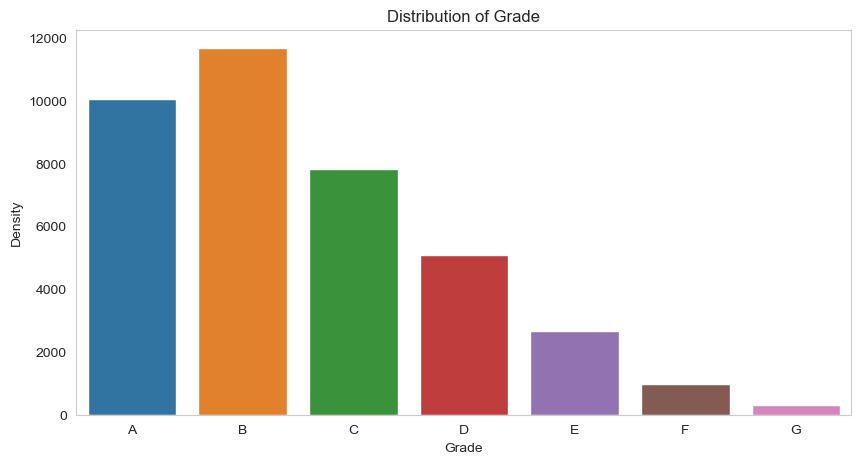

In [58]:
# Distribution of Grade

print(loan.grade.value_counts()*100/loan.grade.count())

loan.grade=loan.grade.astype('category')
plt.figure(figsize=(10,5))
sns.countplot(x ='grade', data = loan)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Grade')
plt.show()


Inference: Most of the loans (55%) are with grade 'A','B' and 'C'. So more than 50% of the loans are high grade.

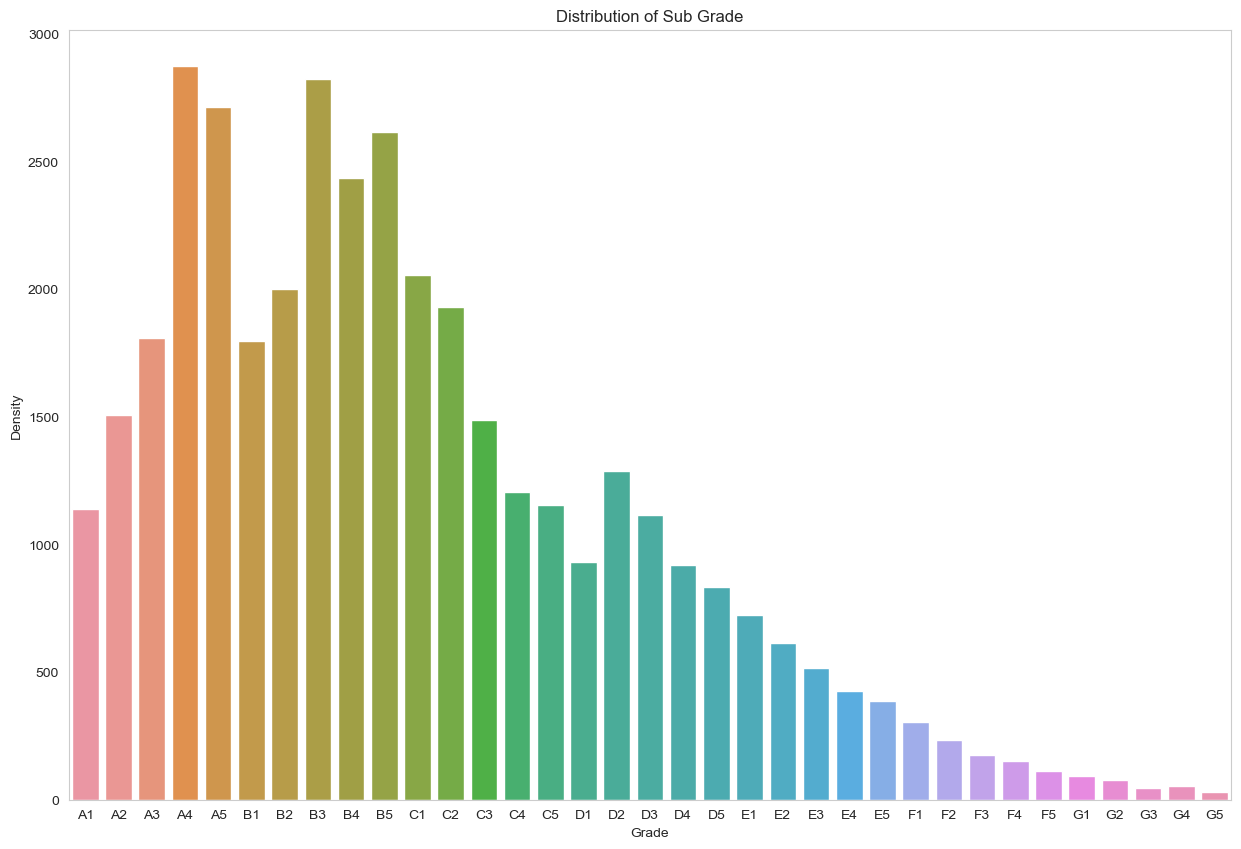

In [59]:
# Distribution of Sub grade

#print(loan.sub_grade.value_counts()*100/loan.sub_grade.count())

loan.sub_grade=loan.sub_grade.astype('category')
plt.figure(figsize=(15,10))
sns.countplot(x ='sub_grade', data = loan)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Sub Grade')
plt.show()

#### Inference: 
Among the grades A & B, majority of the borrowers belong to lower subgrades like A4, A5, B3, B4, B5. On the contrary, among the grades from C to G, majority of the borrowers belong to higher subgrades like C1, C2, D2, D3, E1, E2 and so on.

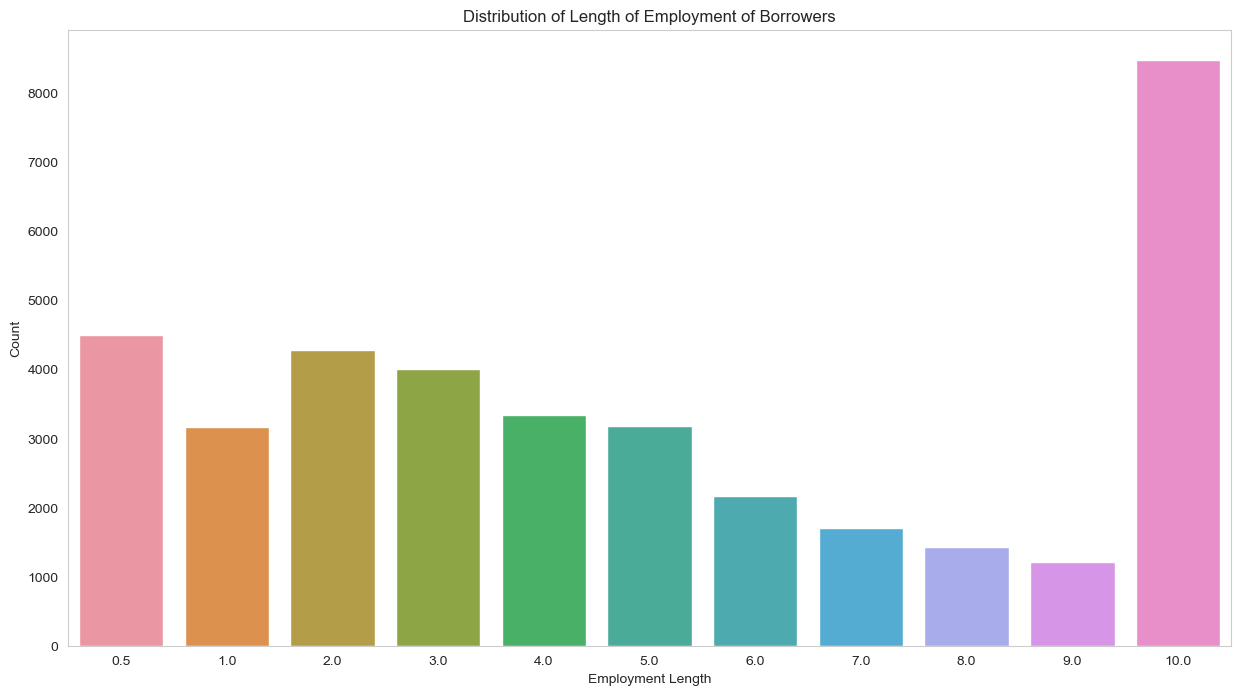

In [60]:
# Distribution of emp_length

plt.figure(figsize=(15,8))
sns.countplot(x ='emp_length', data = loan)
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Length of Employment of Borrowers',fontsize=12)
plt.show()

Inference: Majority of borrowers have working experience greater than 10 years.

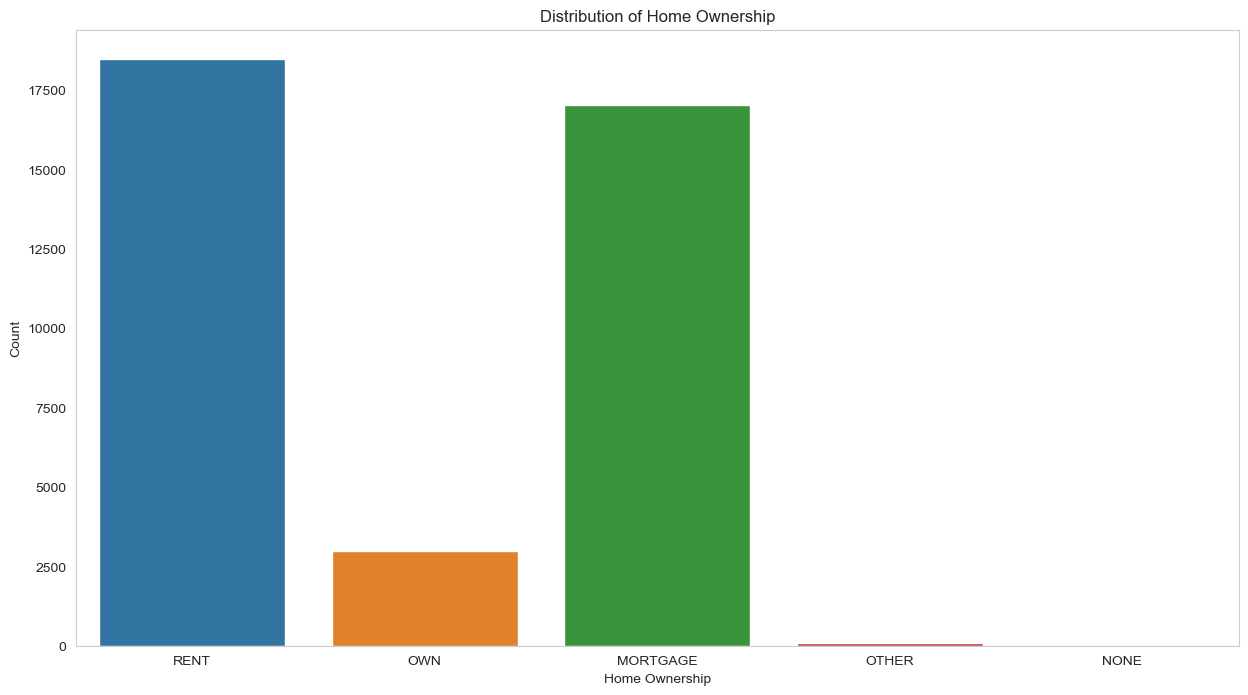

In [61]:
# Distribution of home_ownership

plt.figure(figsize=(15,8))
sns.countplot(x ='home_ownership', data = loan)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership',fontsize=12)
plt.show()

Inference: Majority of borrowsers don't own a property and are on either mortage or rent.

verification_status
Not Verified       43.274490
Verified           31.640615
Source Verified    25.084895
Name: count, dtype: float64


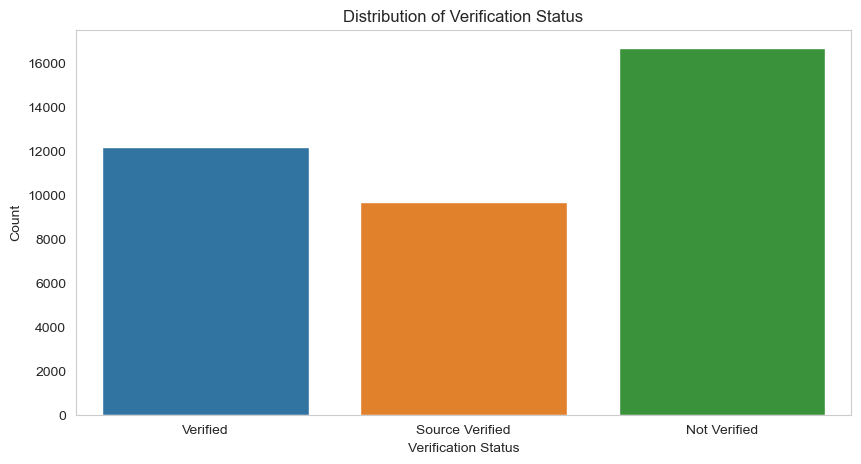

In [62]:
# Distribution of verification_status

print(loan.verification_status.value_counts()*100/loan.verification_status.count())

plt.figure(figsize=(10,5))
sns.countplot(x ='verification_status', data = loan)
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verification Status',fontsize=12)
plt.show()

Inference: About 55% of the borrowers are verified by the company or have source verified.

38191
loan_status
Fully Paid     32607
Charged Off     5584
Name: count, dtype: int64


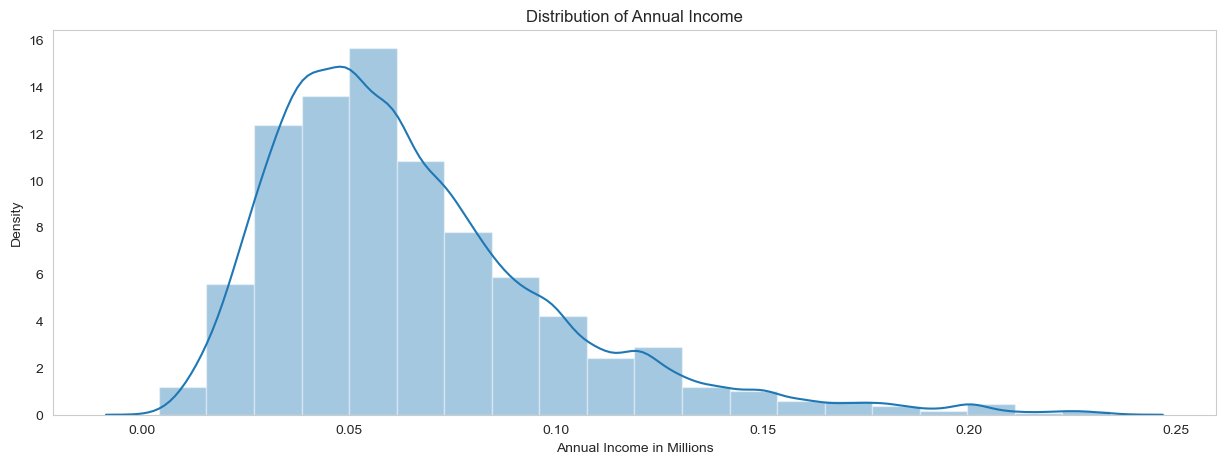

In [63]:
# Distribution of annual_inc

# Exclude the outliers before finding the distribution
Income_group_below_outlier = loan[loan.annual_inc <= np.percentile(loan.annual_inc,99)]
print(len(Income_group_below_outlier))
print(Income_group_below_outlier.loan_status.value_counts())

plt.figure(figsize=(15,5))
sns.distplot((Income_group_below_outlier.annual_inc/1000000),kde=True,bins=20)

plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()

Inference: Annual Income shows right skewed normal distribution. This implies that  majority of borrowers have fairly low annual income as compared to rest who are less in numbers.

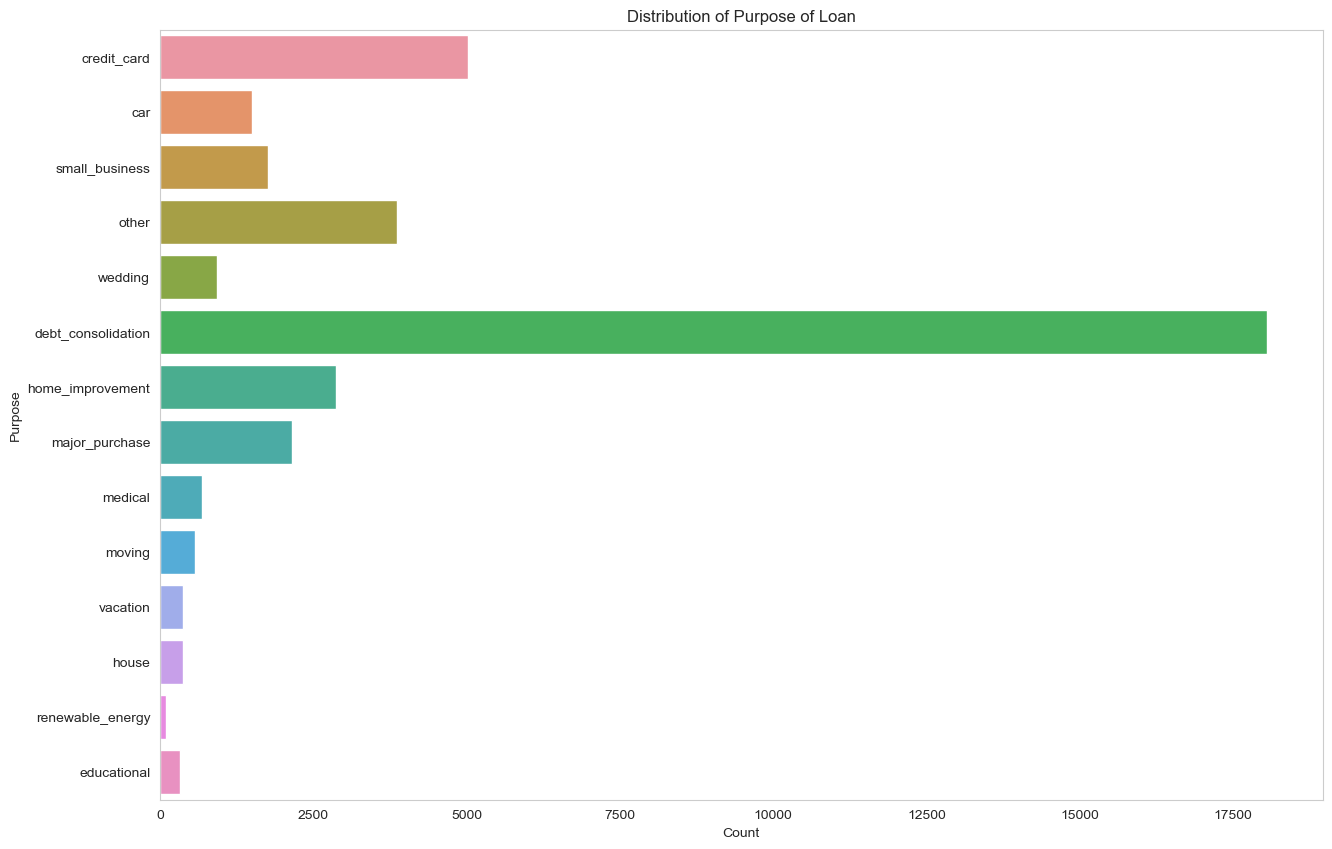

In [64]:
# Distribution of purpose

plt.figure(figsize=(15,10))
sns.countplot(y ='purpose', data = loan)
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose of Loan',fontsize=12)
plt.show()

Inference: Majority of the loans are taken for debt consolidation followed by credit card. So such borrowers already have running debt to cover. And they take loan to pay for their credit card outstanding.

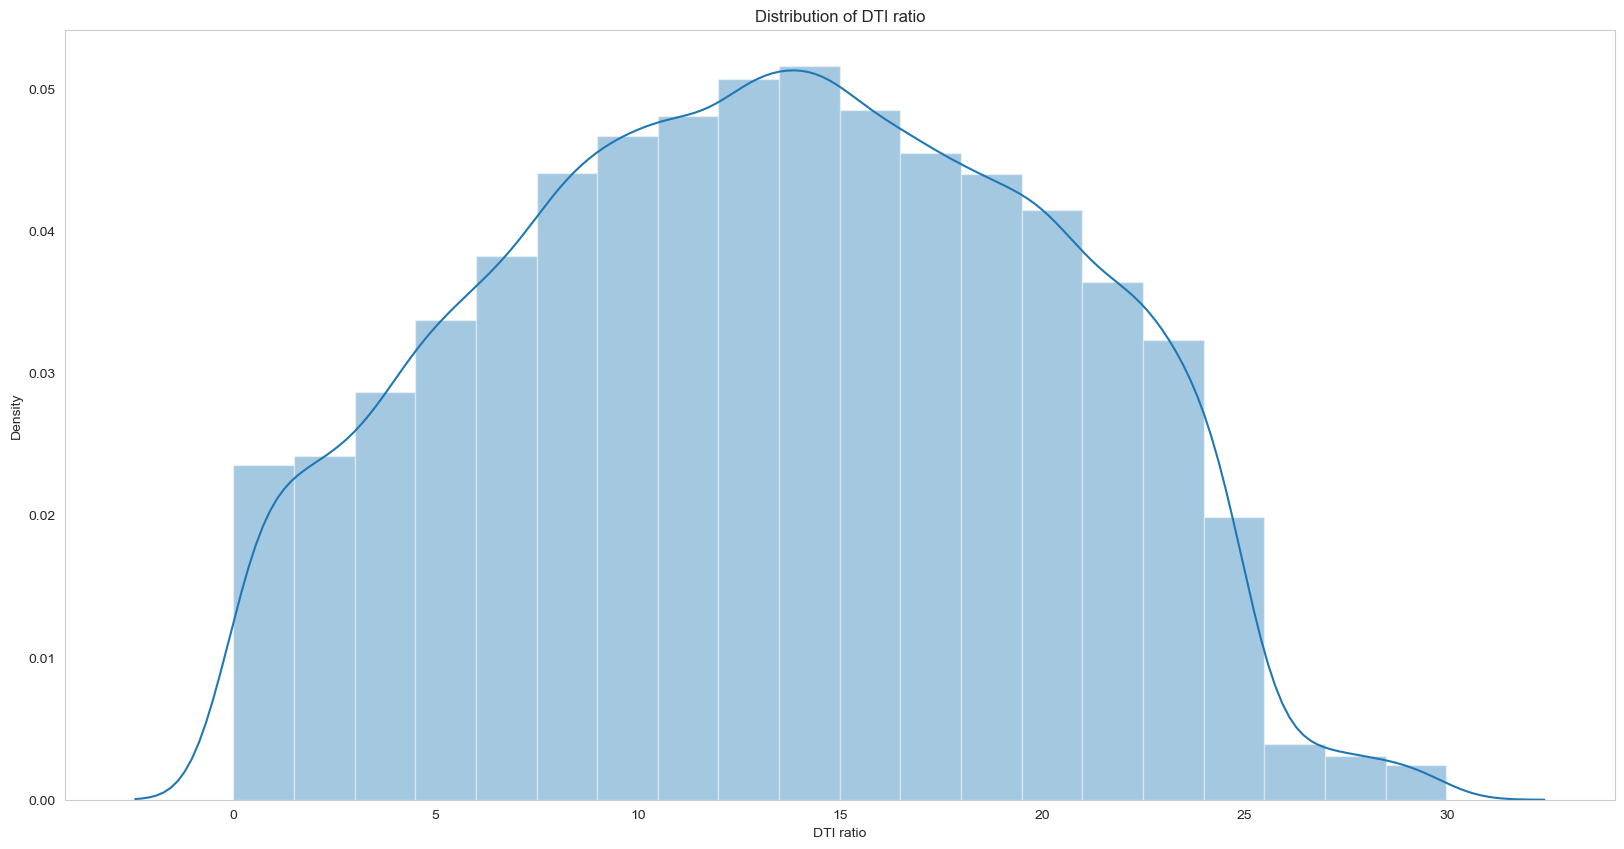

In [65]:
# Distribution of dti

plt.figure(figsize=(20,10))
sns.distplot(sorted(loan.dti),kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=12)
plt.show()

Inference: Majority of the borrowers have very large debt compared to their income, concentrated mostly in the 10-20 DTI ratio.

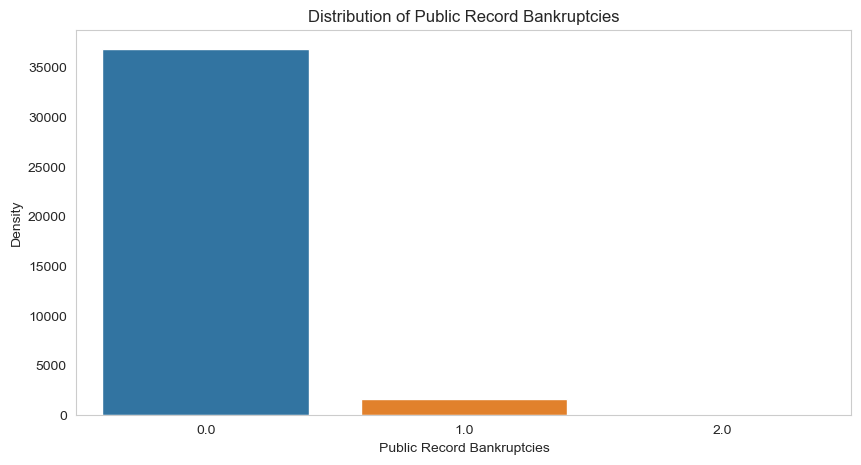

In [66]:
# Distribution of pub_rec_bankruptcies

plt.figure(figsize=(10,5))
sns.countplot(x ='pub_rec_bankruptcies', data = loan)
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Density')
plt.title('Distribution of Public Record Bankruptcies',fontsize=12)
plt.show()

Inference: Majority of the borrowers have no record of Public Recorded Bankruptcy. This should be reported to the public authorities in order to thoroughly examine the history of each borrower

# Segmented Univariate Analysis

In [67]:
defaulters=loan[loan.loan_status == 'Charged Off']
fullypaid=loan[loan.loan_status == 'Fully Paid']


<Figure size 10000x1000 with 0 Axes>

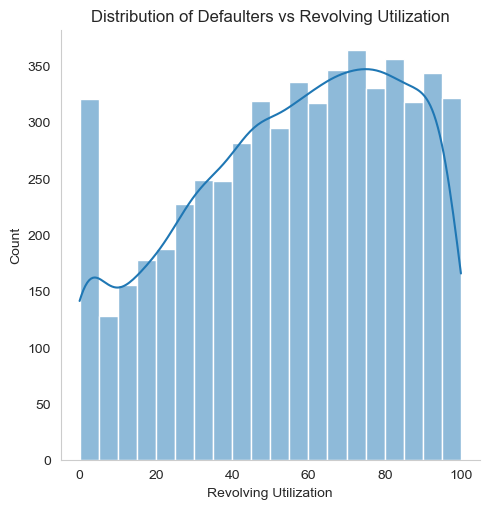

In [68]:
# Distribution of Defaulters vs Revolving Utilization

plt.figure(figsize=(100,10))
sns.displot(defaulters.revol_util, kde = True, bins=20)
plt.xlabel('Revolving Utilization')
plt.ylabel('Count')
plt.title('Distribution of Defaulters vs Revolving Utilization',fontsize=12)
plt.show()


<Figure size 10000x1000 with 0 Axes>

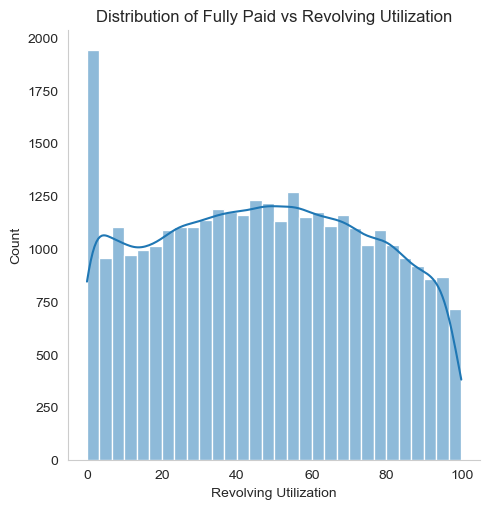

In [69]:
# Distribution of Fully Paid vs Revolving Utilization

plt.figure(figsize=(100,10))
sns.displot(fullypaid.revol_util, kde = True, bins=30)
plt.xlabel('Revolving Utilization')
plt.ylabel('Count')
plt.title('Distribution of Fully Paid vs Revolving Utilization',fontsize=12)
plt.show()

Revolving utilisation¶

As per the below graph, customers who charged off has high revolving utilisation.they have a growing curve. Whereas fully paying customers have a decreasing curve in revolving utilisation.

Defaulters are more likely to have higher revolving line utilisation rate. (i.e) The defaulters tend to use more than 60 percent of their credit limit whereas people who tend to pay fully has low revolving utilisation.

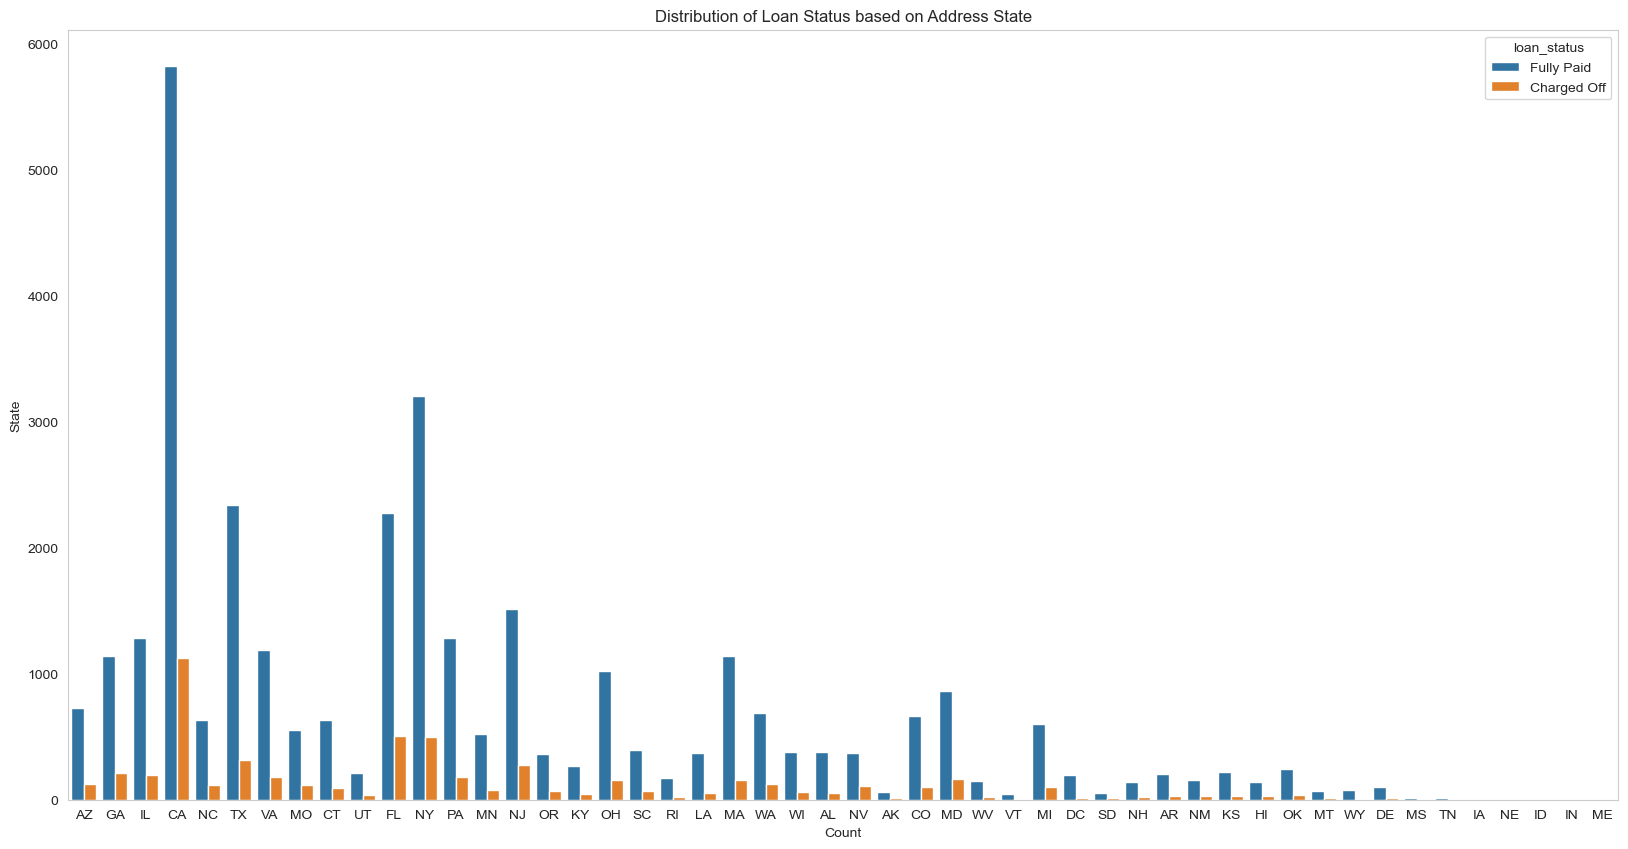

In [70]:
# Distribution of Loan Status based on Address State

plt.figure(figsize=(20,10))
sns.countplot(data = loan, x ='addr_state', hue ='loan_status')
#sns.countplot(data = loan, x ='addr_state')
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Distribution of Loan Status based on Address State',fontsize=12)
plt.show()

Inference: Majority of the borrowers are from states of California, New York, Texas, Florida and New Jersey. Majority of 
    the defaulters among the borrowers also belong to these states.

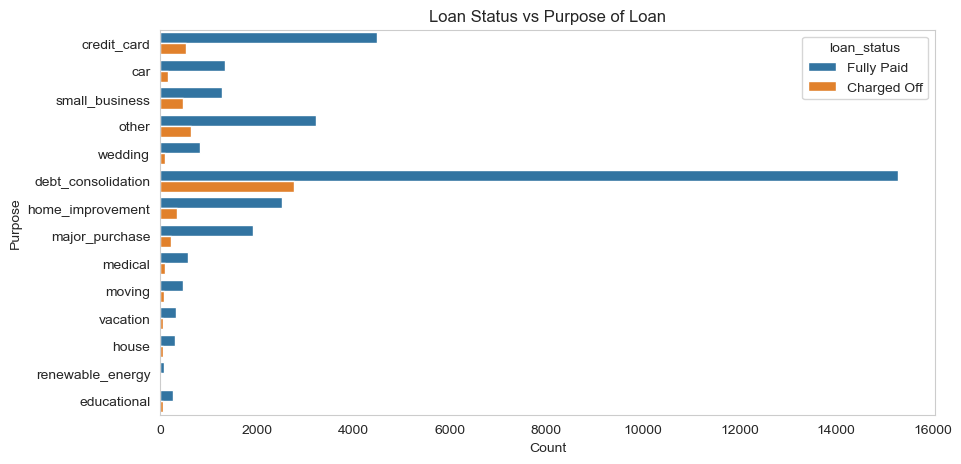

In [71]:
# Distribution of Loan Status based on Purpose of Loan

plt.figure(figsize=(10,5))
sns.countplot(data=loan,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Status vs Purpose of Loan',fontsize=12)
plt.show()

Inference: Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

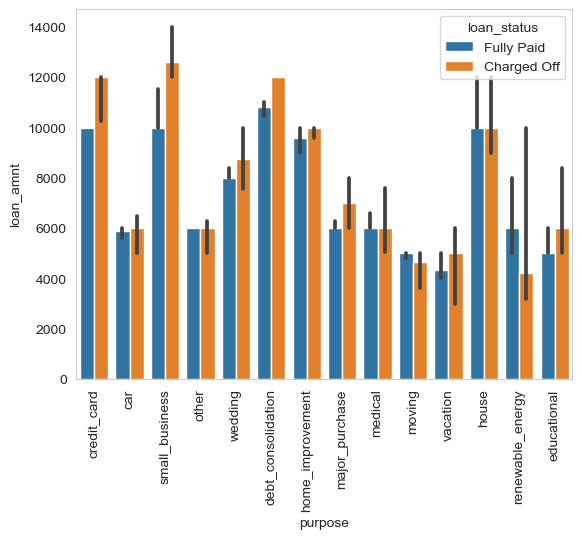

In [72]:
sns.barplot(loan,x='purpose',y='loan_amnt',hue='loan_status',estimator=np.median)
plt.xticks(rotation=90)
plt.show()

Inference: Loan amount which is charged off is greater than the loan amount fully paid amomg all loan purposes.

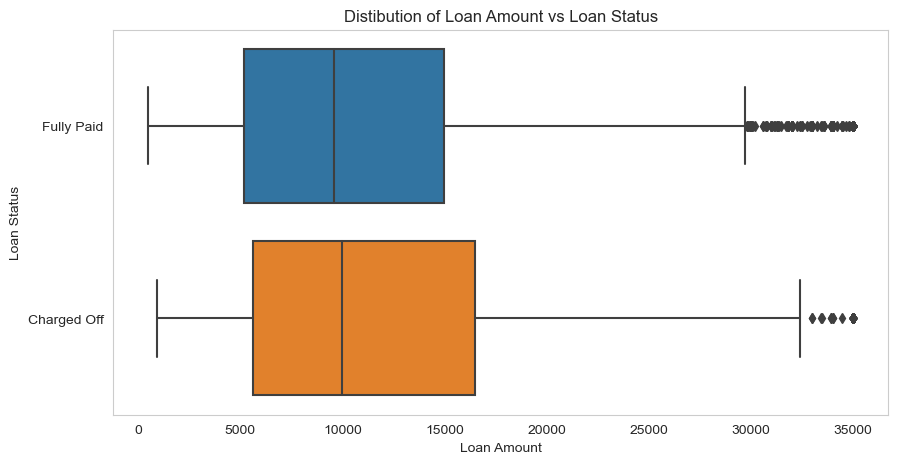

In [73]:
# Distribution of Loan Status based on Loan Amount

plt.figure(figsize=(10,5))
sns.boxplot(data=loan,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount vs Loan Status',fontsize=12)
plt.show()

Inference: The mean and 25% percentile are same for both 'Fully Paid' and 'Charged Off' but we see larger 75% percentile in the defaulted loan which indicate large amount of loan has higher chance of defaulting.

In [74]:
# Same as above but in different format

fig = px.box(loan,x='loan_amnt',y='loan_status', width=750,height=350, title='Distibution of Loan Amount For Loan Status',
             labels={'loan_amnt':'Loan Amount', 'loan_status':'Loan Status'})

fig.show()

term
36    57.348498
60    42.651502
Name: count, dtype: float64


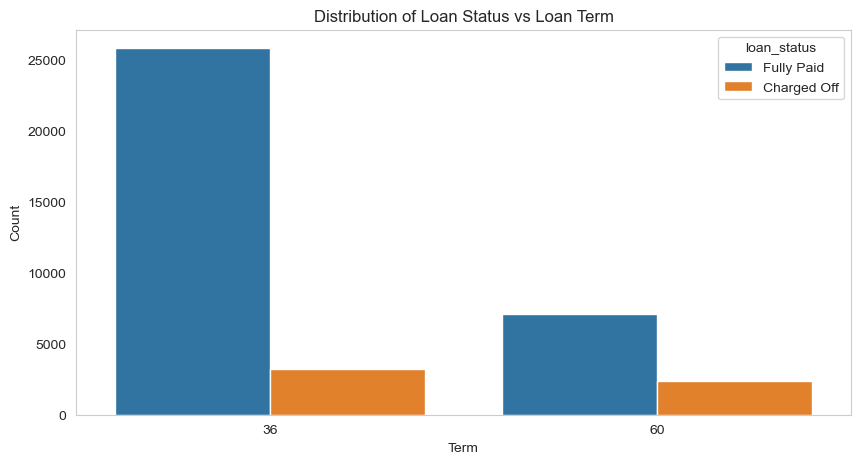

In [75]:
# Distribution of Loan Status based on Loan Term

defaulters=loan[loan.loan_status == 'Charged Off']
fullypaid=loan[loan.loan_status == 'Fully Paid']

print(defaulters.term.value_counts()*100/defaulters.term.count())

plt.figure(figsize=(10,5))
sns.countplot(data=loan,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Loan Status vs Loan Term',fontsize=12)
plt.show()

Inference: Borrowers with 36 months as loan term have slightly higher chance of defaulting than borrowers with 60 months loan term. But there is no significant difference. Also, the 36 month loan term has higher chance of getting fully paid.

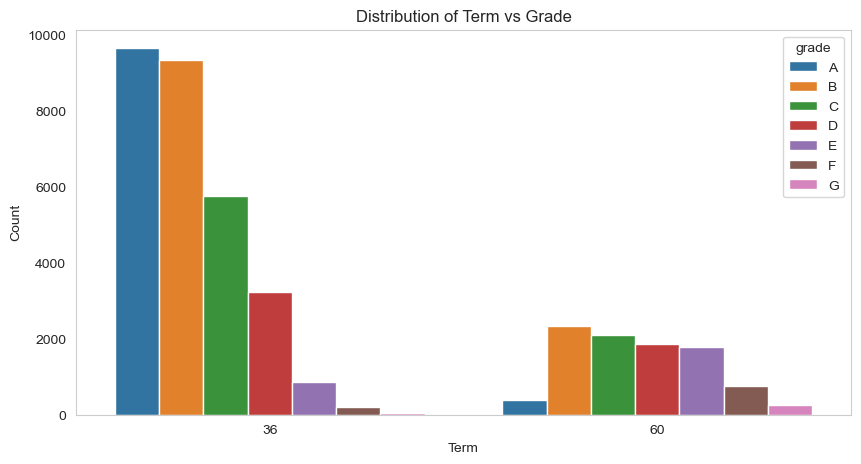

In [76]:
# Distribution of Term vs Grade

plt.figure(figsize=(10,5))
sns.countplot(data=loan,x='term',hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term vs Grade',fontsize=12)
plt.show()

Inference: The loans with 36 months term majorly consist of grade A and B loans whereas the loans with 60 month term mostly consist of grade B, C and D loans.

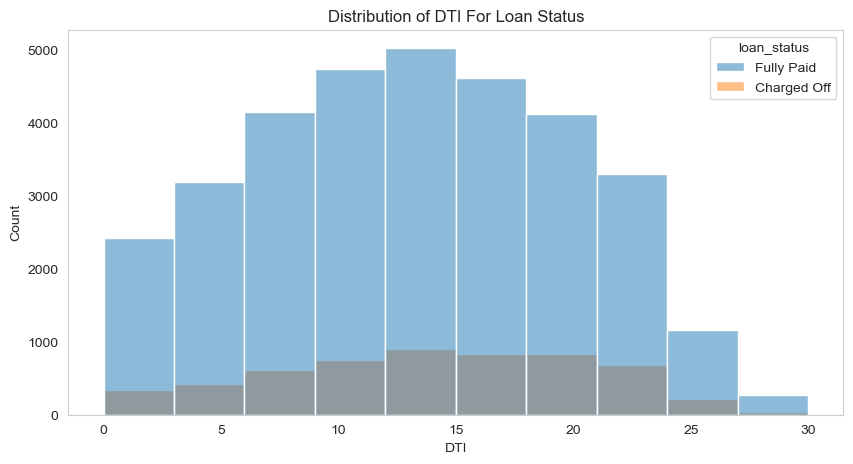

In [77]:
# Distribution of DTI based on Loan status

plt.figure(figsize=(10,5))
sns.histplot(data=loan,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

#### Inference: 
Loans in DTI ratio 10-15 and 15-20 have higher number of defaulted loan and also borrowers with higher dti have higher chance of defaulting.

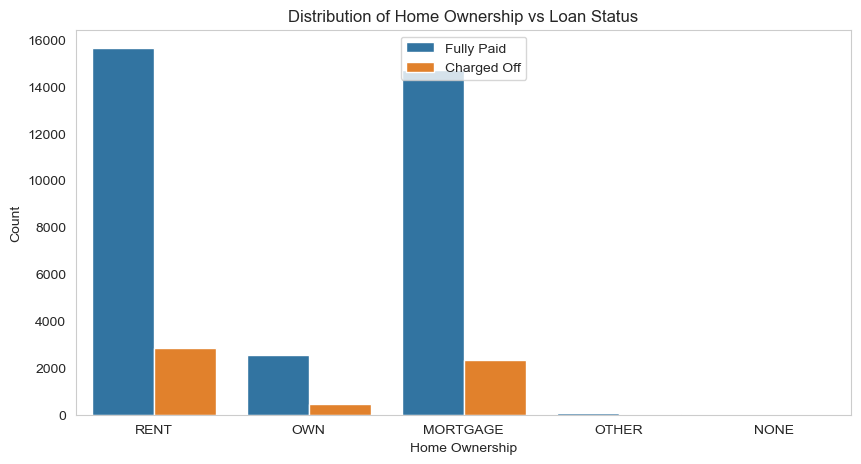

In [78]:
# Distribution of house_ownership based on loan_status

plt.figure(figsize=(10,5))
sns.countplot(data=loan,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership vs Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

#### Inference: 
Borrowers who own their property tend to default loans much less than those are on mortgage or rent.

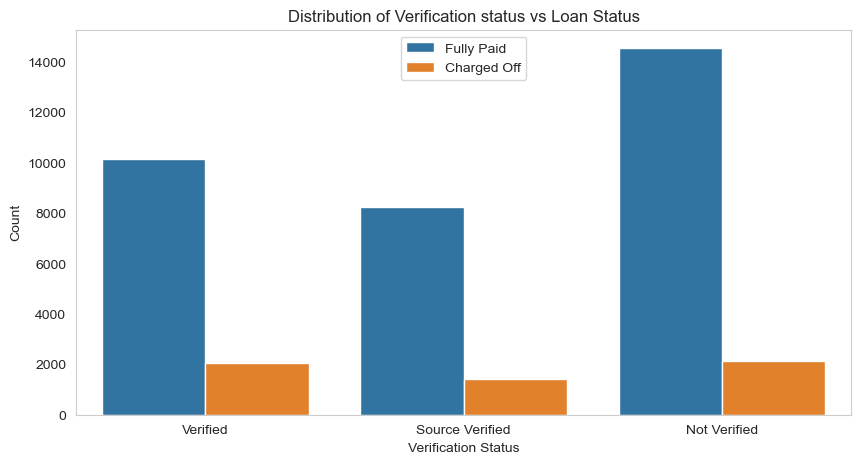

In [79]:
# Distribution of Verification status based on Loan Status

plt.figure(figsize=(10,5))
sns.countplot(data=loan,x='verification_status',hue='loan_status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verification status vs Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

Inference: The number of defaulters is invariably same whether the income or the income source of the borrower was verified or not.

38191
loan_status
Fully Paid     32607
Charged Off     5584
Name: count, dtype: int64


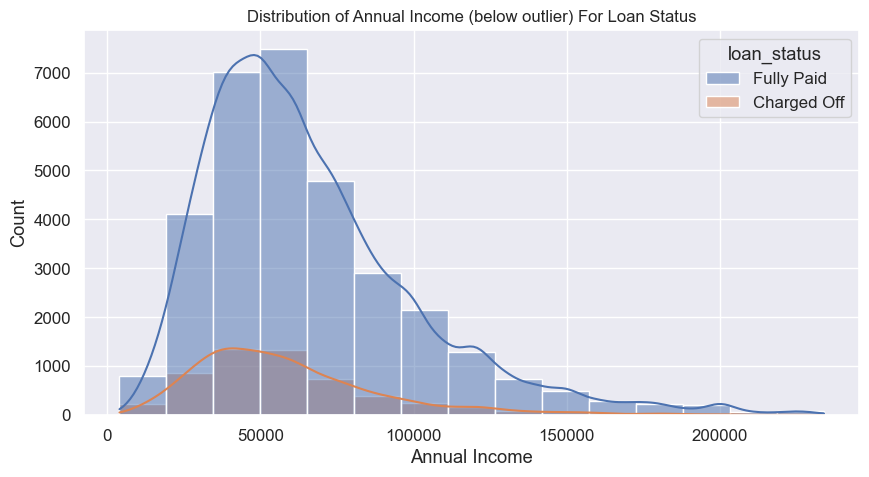

In [96]:
# Distribution of annual_inc (below outlier) based on loan_status

# Exclude the outliers before finding the distribution
Income_group_below_outlier = loan[loan.annual_inc <= np.percentile(loan.annual_inc,99)]
print(len(Income_group_below_outlier))
print(Income_group_below_outlier.loan_status.value_counts())

plt.figure(figsize=(10,5))
sns.histplot(data=Income_group_below_outlier,x='annual_inc',hue='loan_status',bins=15,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income (below outlier) For Loan Status',fontsize=12)
plt.show()

Inference: Borrowers with less than or equal to 100000 annual income are more likely to default than higher annual income are less likely to default.

386
loan_status
Fully Paid     343
Charged Off     43
Name: count, dtype: int64


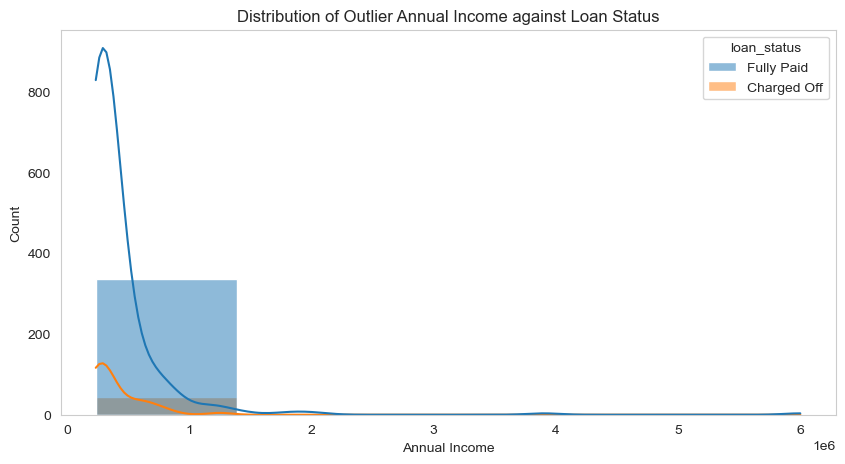

In [81]:
# Distribution of outlier Annual Income based on loan_status

# Keep the outliers in a separate dataset
Outlier_income_group = loan[loan.annual_inc > np.percentile(loan.annual_inc,99)]
print(len(Outlier_income_group))
print(Outlier_income_group.loan_status.value_counts())

plt.figure(figsize=(10,5))
sns.histplot(data=Outlier_income_group,x='annual_inc',hue='loan_status',bins=5,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Outlier Annual Income against Loan Status',fontsize=12)
plt.show()


Inference: Among the outliers income makers, only 11% turned out to be defaulters. So outlier income group is not an indicator of potential loan defaulters.

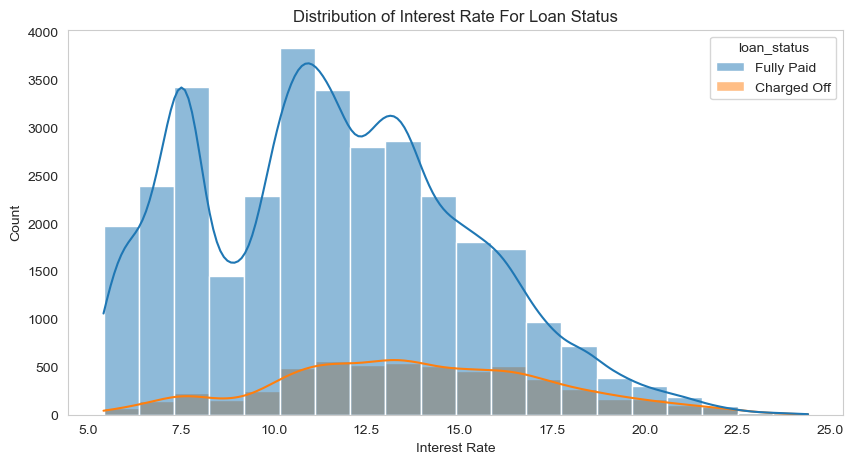

In [82]:
# Distribution of Loan Status based on Interest Rate

plt.figure(figsize=(10,5))
sns.histplot(data=loan,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

Inference: The number of loan defaulters increases with interest rate and but again we see a slow decline in loan defaulters when interest rate is above 17.0

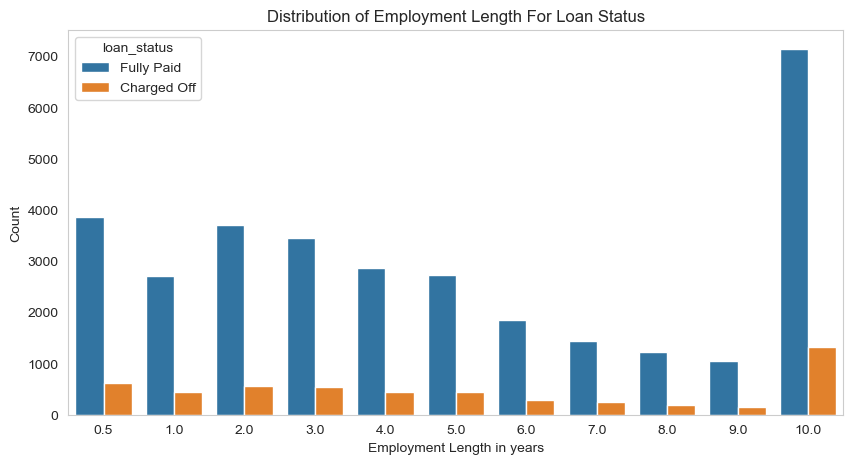

In [83]:
# Distribution of emp_length based on loan_status

plt.figure(figsize=(10,5))
sns.countplot(data=loan,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status',fontsize=12)
plt.show()

Inference: The Employees with 10+ years of experience are likely to default and also have higher chance of fully paying the loan.

# Bivariate Analysis

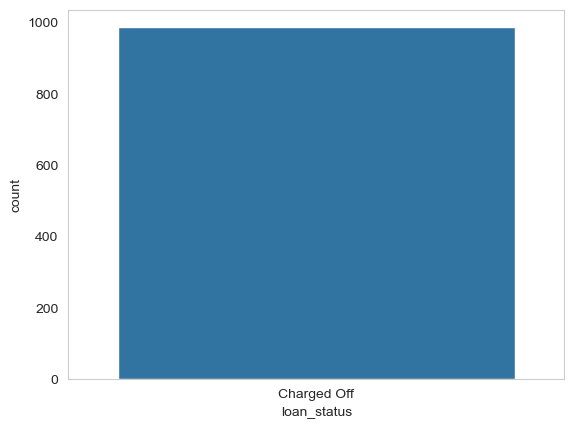

In [84]:
# Comparing Total Interest paid and Total Principle paid against Loan Status

moreintpaid=loan[loan.total_rec_int > loan.total_rec_prncp]
sns.countplot(moreintpaid,x='loan_status')
plt.show()


Inference : People who paid more interest exceeding the principal paid, are 100% defaulters. Such customers are the riskiest.


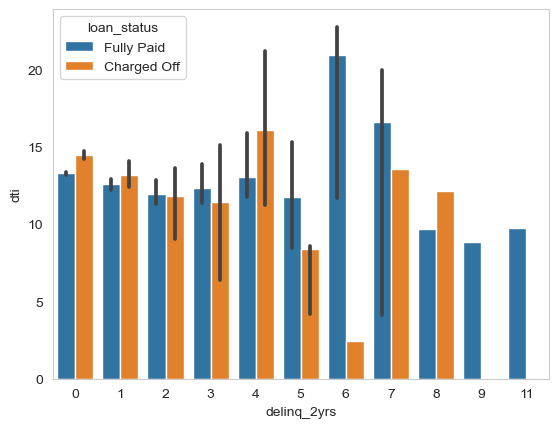

In [85]:
# Comparing DTI and Delinquency in past 2 years against Loan Status

sns.barplot(loan,x='delinq_2yrs',y='dti',hue='loan_status',estimator=np.median)
plt.show()

Inference: Borrowers having DTI more than 12 and around 4 cases of delinquency in past 2 years have high chances to default their loan.

AttributeError: Rectangle.set() got an unexpected keyword argument 'stat'

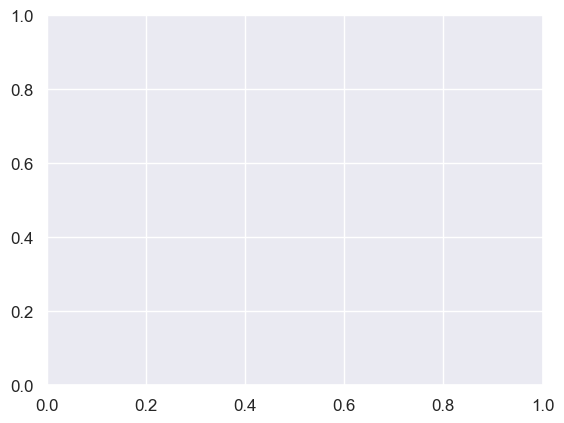

In [94]:
#Comparing loan duration and loan status

loan['loan_paid_yrs']=loan['last_pymnt_d_year']-loan['issue_d_year']
sns.countplot(loan,x='loan_paid_yrs',hue='loan_status',stat='percent',native_scale=False)
plt.xticks(rotation=90)
plt.show()

Inference: Most of the borrowers who paid fully, took a loan duration for 3 years. Defaulters default within first 2 years of loan duration.

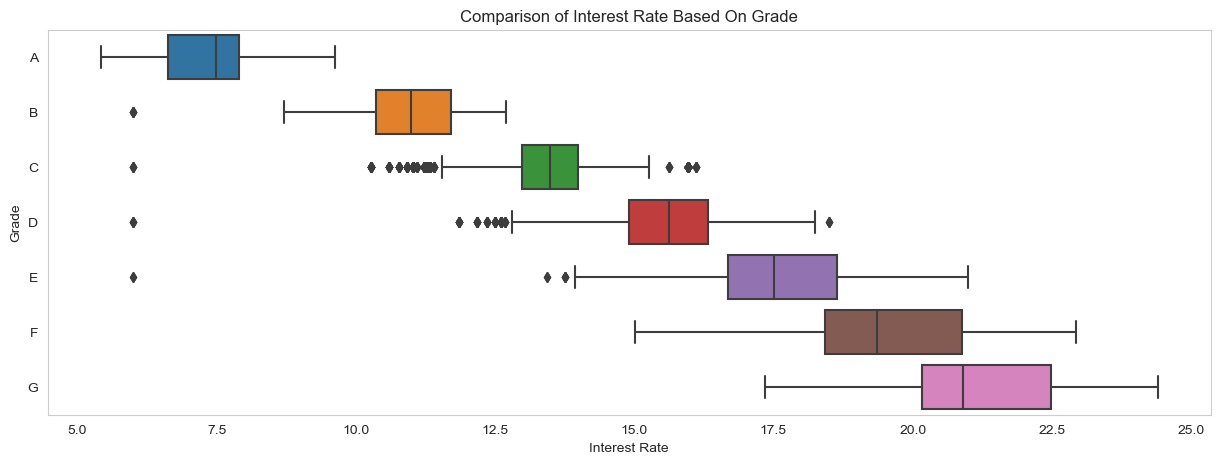

In [87]:
# Comparison of Interest Rate vs Grade

plt.figure(figsize=(15,5))
sns.boxplot(data=loan,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

Inference: The lower the Grade the riskier is the borrower's profile. So we see that interest rate imposed is higher for lower Grade borrowers as compared to higher grade borrowers.

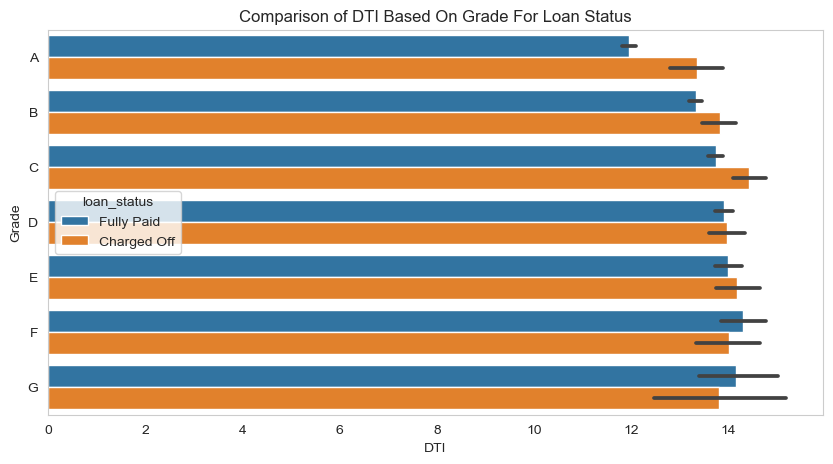

In [88]:
# Comparison of DTI over grade for loan status

plt.figure(figsize=(10,5))
sns.barplot(data=loan,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status',fontsize=12)
plt.show()

Inference: The Grade A which is lowest risk also has lowest DTI ratio from which we can say that higher grade has lower rate of default.

38191
loan_status
Fully Paid     32607
Charged Off     5584
Name: count, dtype: int64


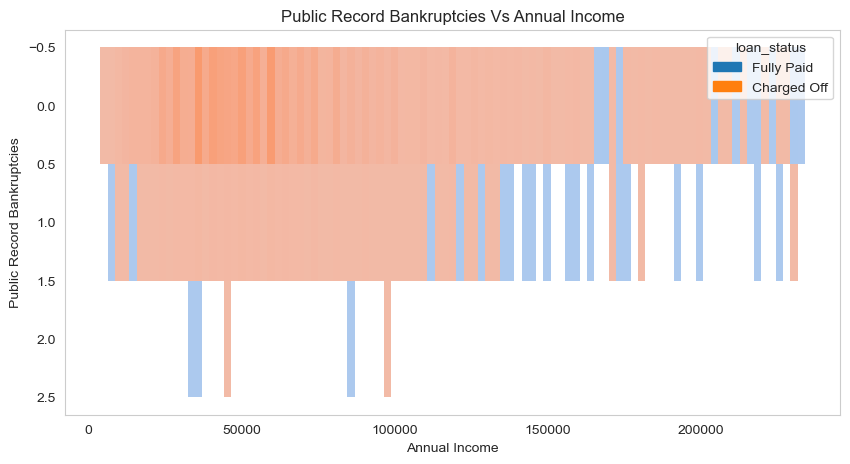

In [89]:
# Comparison of annual income to public record bankruptcy over loan status

# Exclude the outliers before finding the distribution
Income_group_below_outlier = loan[loan.annual_inc <= np.percentile(loan.annual_inc,99)]
print(len(Income_group_below_outlier))
print(Income_group_below_outlier.loan_status.value_counts())

plt.figure(figsize=(10,5))
sns.histplot(y=Income_group_below_outlier.pub_rec_bankruptcies.astype('category'),
            x=Income_group_below_outlier.annual_inc,hue=loan.loan_status)
plt.xlabel('Annual Income')
plt.ylabel('Public Record Bankruptcies')
plt.title('Public Record Bankruptcies Vs Annual Income',fontsize=12)
plt.show()

Inference: The borrowers almost do not have a  record of Public Recorded Bankruptcy irrespective of income levels. So this factor cannot be a determinant of loan defaulters.

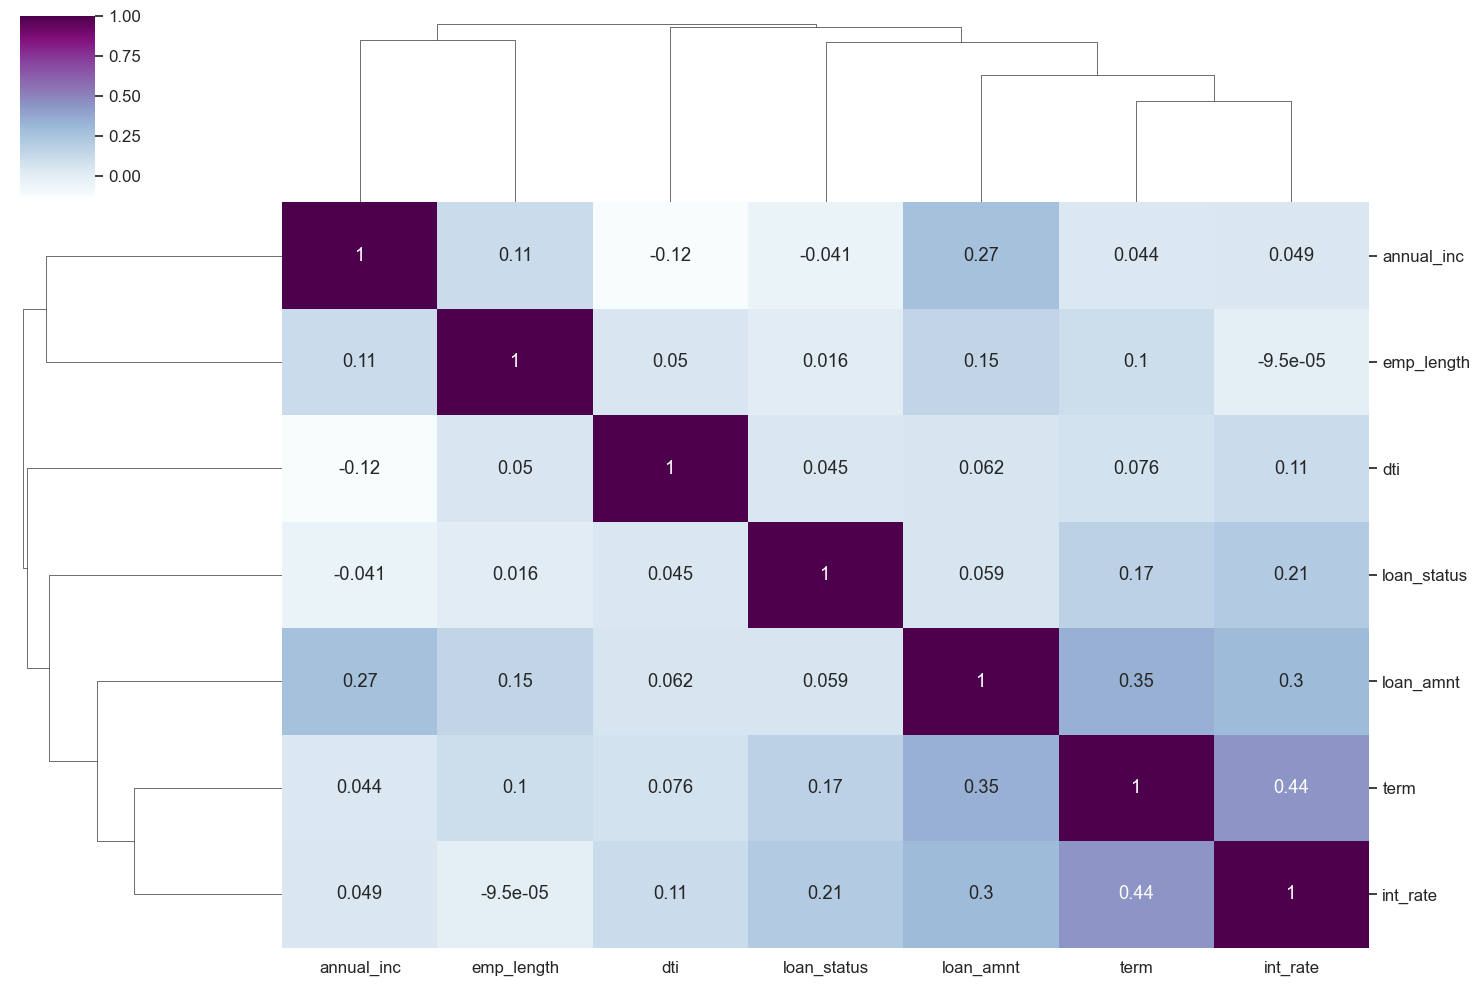

In [90]:
# Heatmap to find correlation between any two variables.

#Transforming the values of 'loan_status' column from string to numeric as heatmap needs numerical variables

loan500 = loan
loan500.loan_status=loan500.loan_status.apply(lambda x : str(x.replace('Fully Paid','0')))
loan500.loan_status=loan500.loan_status.apply(lambda x : str(x.replace('Charged Off','1')))

loan500["loan_status"] = loan500["loan_status"].apply(pd.to_numeric)


loan501 = loan500[['loan_amnt','term','int_rate', 'annual_inc', 'emp_length', 'dti', 'loan_status']]
loan_correlation = loan501.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(15, 10),cmap="BuPu")
plt.show()



Inference: There is no strong correlation between Loan Status and any of the numerical variables. 
Only loan_status has very low positive correlative with Loan term and interest rate. So higher loan term and higher interest rate may potentially lead to default.

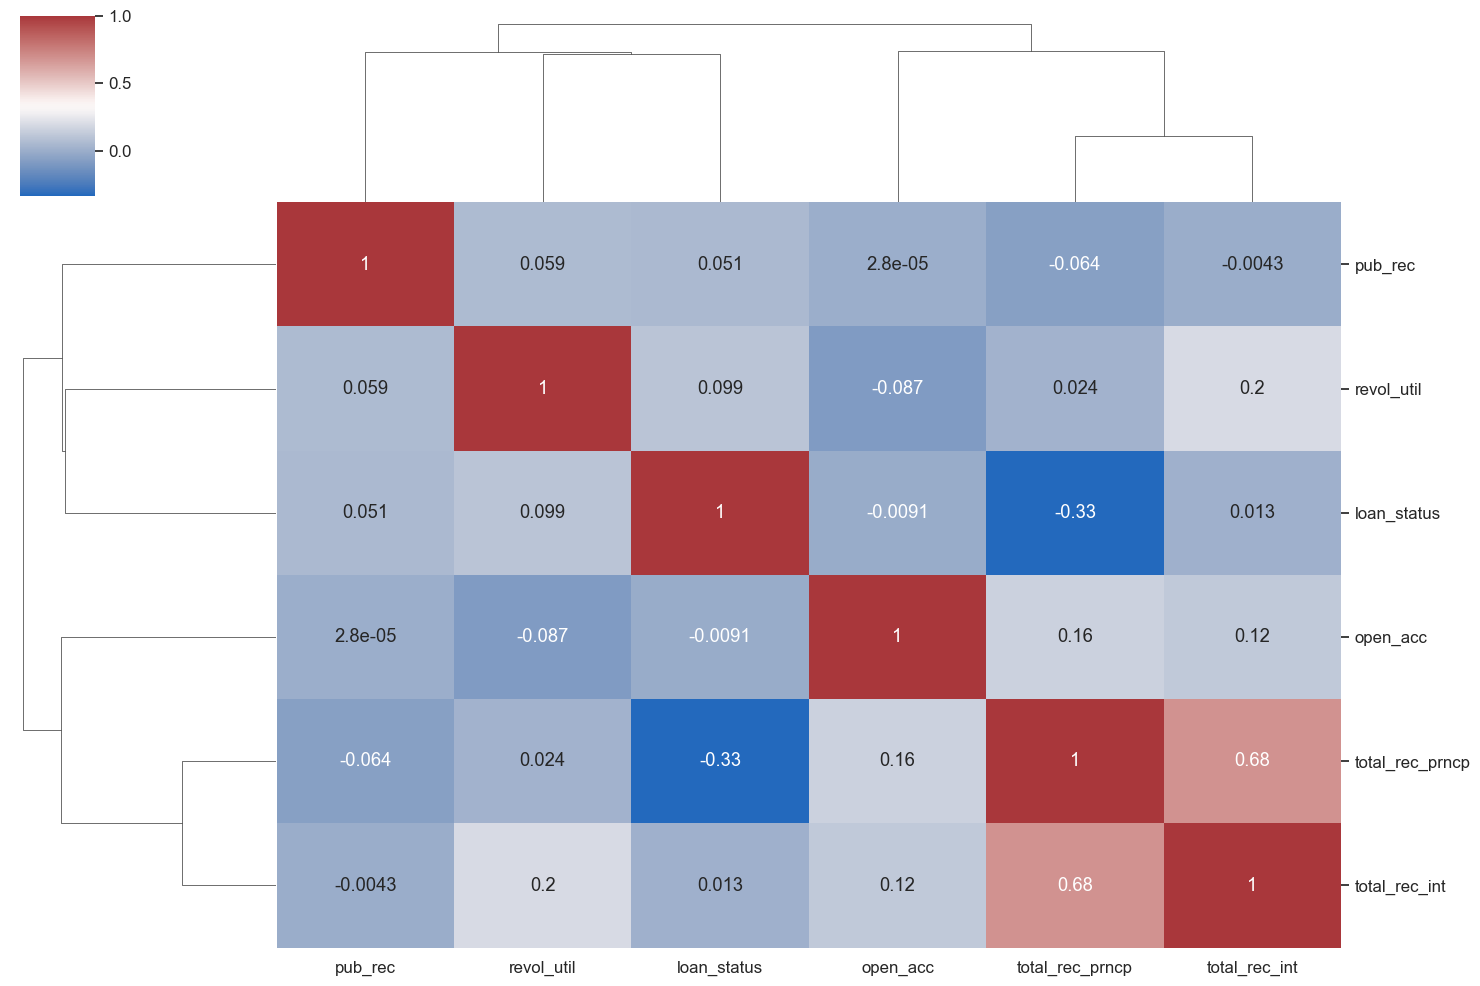

In [91]:
# Subjecting more variables to heatmap analysis

loan501 = loan500[['open_acc', 'pub_rec', 'revol_util', 'total_rec_prncp', 'total_rec_int', 'loan_status']]
loan_correlation = loan501.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(15, 10),cmap="vlag")
plt.show()

Inference: There is no strong correlation between Loan Status and any of the numerical variables.

# Summary of EDA

## Univariate Analysis

o	Close to 15% of the loan borrowers during the period 2007 – 20111 turned out to be defaulters.

o	3/4th of the borrowers took a loan for 36 months, 1/4th took for 60 months.

o	Majority of borrowers availed their loan with interest rate in between 5-7% and 10-15%. Very few borrowers availed their loan with interest ranging from 20-25%.

o	55% of the loans (regardless of loan type) granted during 5 years were with grade ‘A’, ‘B’ and ‘C’. So more than 50% of the loans are high grade.

o	Among the grades A & B, majority of the borrowers belong to lower subgrades like A4, A5, B3, B4, B5. On the contrary, among the grades from C to G, majority of the borrowers belong to higher subgrades like C1, C2, D2, D3, E1, E2 and so on.

o	Majority of borrowers have working experience greater than 10 years.

o	Majority of borrowers don't own a property and are on either mortgage or rent.

o	About 55% of the borrowers are verified by the company or have source verified.

o	Annual Income shows right skewed normal distribution. This implies that majority of borrowers have fairly low annual income as compared to rest who are less in numbers.

o	Majority of the loans are taken for debt consolidation followed by credit card. So such borrowers already have running debt to cover. And they take loan to pay for their credit card outstanding.

o	Majority of the borrowers have very large debt compared to their income, concentrated mostly in the 10-20 DTI ratio.

o	Majority of the borrowers have no record of Public Recorded Bankruptcy. 

## Segmented Univariate Analysis

o	Defaulters are more likely to have higher revolving line utilisation rate. (i.e) The defaulters tend to use more than 60 percent of their credit limit whereas people who tend to pay fully has low revolving utilisation.

o	Majority of the borrowers are from states of California, New York, Texas, Florida and New Jersey. Majority of the defaulters also belong to these states.

o	Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

o	Loan amount of the borrowers who defaulted turned out to be greater than the loan amount of the borrowers who fully paid among all loan purposes. Larger the amount of loan, higher is the chance of defaulting.

o	There is no significant difference between Borrowers with 36 months as loan term and those with 60 months as loan term as far as the possibility of defaulting a loan is concerned.

o	The loans with 36 months term majorly consist of grade A and B loans whereas the loans with 60 months term mostly consist of grade B, C and D loans.

o	Loans in DTI ratio 10-15 and 15-20 have higher number of defaulters and borrowers with higher DTI have higher chance of defaulting.

o	Borrowers who own their property tend to default loans much less than those are on mortgage or rent.

o	The number of defaulters is invariably same whether the income or the income source of the borrower was verified or not.

o	Borrowers with less than or equal to 100000 annual income are more likely to default than higher annual income are less likely to default.

o	Among the outliers, only 11% turned out to be defaulters. So outlier income group is not an indicator of potential loan defaulters.

o	The number of loan defaulters increases with interest rate and but again we see a slow decline in loan defaulters when interest rate is above 17.0.

o	The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

## Bivariate Analysis: 
    
o	People who paid more interest exceeding the principal paid, are 100% defaulters. Such customers are the riskiest.

o	Borrowers having DTI more than 12 and around 4 cases of delinquency in past 2 years have high chances to default their loan.

o	Most of the borrowers who paid fully, took a loan duration for 3 years. Defaulters default within first 2 years of loan duration.

o	The lower the Grade the riskier is the borrower's profile. So the interest rate imposed is higher for lower Grade borrowers as compared to higher grade borrowers.

o	The Grade A which is lowest risk also has lowest DTI ratio from which we can say that higher grade has lower rate of default.

o	The borrowers almost do not have a record of Public Recorded Bankruptcy irrespective of income levels. So this factor cannot be a determinant of loan defaulters.

o	There is no strong correlation between Loan Status and any of the numerical variables. Only Loan Status has very low positive correlative with Loan term and interest rate. So higher loan term and higher interest rate may potentially lead to default.
